In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# time, adresse, T1, P_DC, 10, 11, 14 massal7inch

In [3]:
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.master(master = "local[*]").appName("Spark1").getOrCreate()

In [4]:
#df1 = spark.read.format("csv").load("df1.csv")

In [5]:
#df1

In [6]:
df1 = pd.read_csv('df1.csv')

In [7]:
df1 = df1[['Time','Adresse','T1','P_DC']]

In [8]:
df1.head()

,Time,Adresse,T1,P_DC
0,'2017-04-20 00:02:00',113,20.2319,0.0
1,'2017-04-20 00:04:00',113,20.1994,0.0
2,'2017-04-20 00:06:00',113,20.1679,0.0
3,'2017-04-20 00:08:00',113,20.1724,0.0
4,'2017-04-20 00:10:00',113,20.2354,0.0


In [9]:
df1.dtypes

Time        object
Adresse      int64
T1         float64
P_DC       float64
dtype: object

In [10]:
df1['Time']= pd.to_datetime(df1['Time'])

In [11]:
df1 = df1.set_index('Time')
df1.head()

,Adresse,T1,P_DC
Time,,,
2017-04-20 00:02:00,113,20.2319,0.0
2017-04-20 00:04:00,113,20.1994,0.0
2017-04-20 00:06:00,113,20.1679,0.0
2017-04-20 00:08:00,113,20.1724,0.0
2017-04-20 00:10:00,113,20.2354,0.0


In [12]:
df1 = df1.resample('1H').mean()
df1

,Adresse,T1,P_DC
Time,,,
2017-04-20 00:00:00,113.0,19.804954,0.0
2017-04-20 01:00:00,113.0,18.352620,0.0
2017-04-20 02:00:00,113.0,17.571907,0.0
2017-04-20 03:00:00,113.0,16.541680,0.0
2017-04-20 04:00:00,113.0,15.982507,0.0
...,...,...,...
2020-06-02 01:00:00,113.0,17.021167,0.0
2020-06-02 02:00:00,113.0,16.538703,0.0
2020-06-02 03:00:00,113.0,16.166043,0.0


In [13]:
df1 = df1.between_time('08:00','18:00')

In [14]:
df1 = df1[df1 >= 0]

In [15]:
df1.isna().sum()

Adresse    2100
T1         2107
P_DC       3993
dtype: int64

In [16]:
df1 = df1.dropna()
df1

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,113.0,16.851623,366.081767
2017-04-20 09:00:00,113.0,19.969697,1257.578933
2017-04-20 10:00:00,113.0,22.107143,1640.896000
2017-04-20 11:00:00,113.0,26.679253,3058.417000
2017-04-20 12:00:00,113.0,32.019423,4536.226000
...,...,...,...
2020-06-01 14:00:00,113.0,49.558130,0.000000
2020-06-01 15:00:00,113.0,45.099617,0.000000
2020-06-01 16:00:00,113.0,41.618023,0.000000


**Histogram**

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

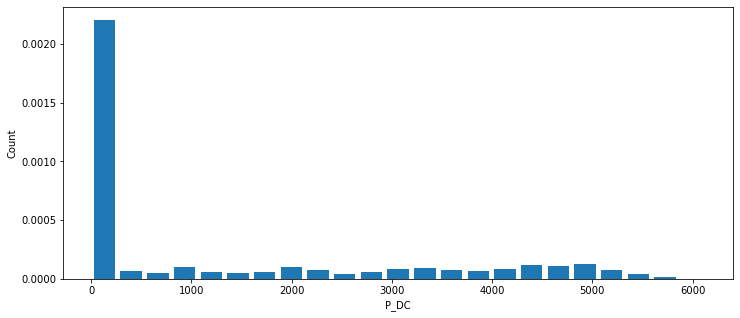

In [18]:
plt.figure(figsize=(12,5))
plt.hist(df1['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

**Scatter plot**

In [19]:
'''
y0 = df1['P_DC'].values
y0 = y0.reshape(-1, 1)
y0.shape



for i in df1.columns:
    x1 = df1['{}'.format(i)]
    plt.scatter(x1, y0, color='blue')
    plt.xlabel(i)
    plt.ylabel('P_DC')
    plt.show()
'''

"\ny0 = df1['P_DC'].values\ny0 = y0.reshape(-1, 1)\ny0.shape\n\n\n\nfor i in df1.columns:\n    x1 = df1['{}'.format(i)]\n    plt.scatter(x1, y0, color='blue')\n    plt.xlabel(i)\n    plt.ylabel('P_DC')\n    plt.show()\n"

**Exploration**

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

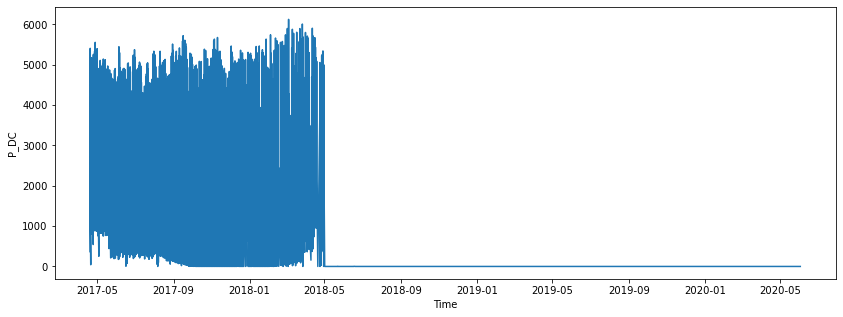

In [20]:
import seaborn as sn
plt.figure(figsize=(14,5))
sn.lineplot(x=df1.index ,y='P_DC' ,data=df1)

In [21]:
mask = (df1.index <= '2018-05-01')
df1 = df1.loc[mask]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

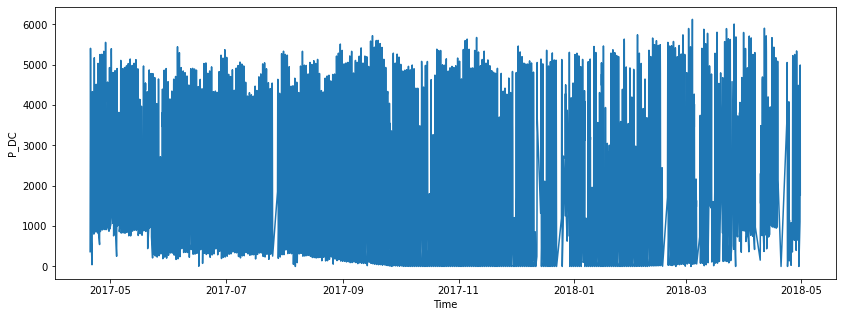

In [22]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df1.index ,y='P_DC' ,data=df1)

Text(0, 0.5, 'Count')

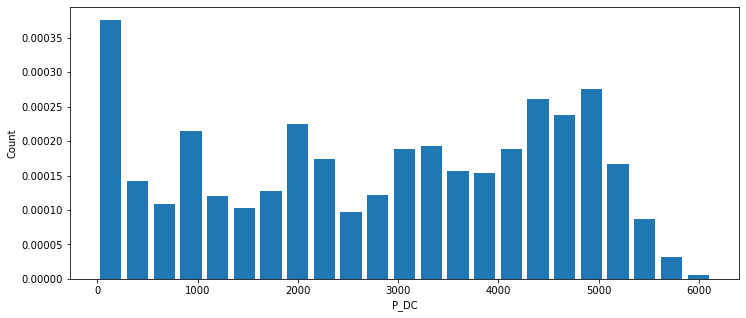

In [23]:
plt.figure(figsize=(12,5))
plt.hist(df1['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

# Stationary test

In [24]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df1['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.0500711624080967e-11


# Autocorrelation_ PACF

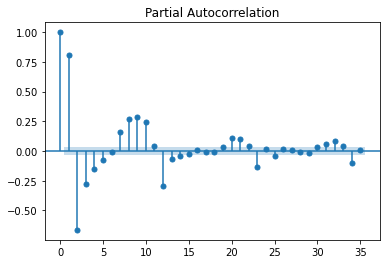

In [25]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df1['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR

In [26]:
df_AR1 = df1['P_DC']

In [27]:
train_size = int(len(df1) * 0.95)
test_size = len(df1) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df1)]
print(len(train), len(test))

3720 196


In [28]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags = 5).fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [29]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 3720
Model:                     AutoReg(5)   Log Likelihood              -29605.783
Method:               Conditional MLE   S.D. of innovations            699.466
Date:                Thu, 12 Aug 2021   AIC                             13.104
Time:                        14:27:57   BIC                             13.116
Sample:                             5   HQIC                            13.109
                                 3720                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1448.3053     39.522     36.645      0.000    1370.843    1525.768
P_DC.L1        1.1146      0.016     68.187      0.000       1.083       1.147
P_DC.L2       -0.3541      0.025    -14.445      0.0

In [30]:
pred = model.predict(start = train_size, end = len(df1)-1, dynamic = False)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


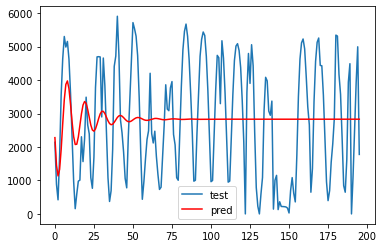

In [31]:
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA

In [32]:
#pip install pmdarima

In [33]:
from pmdarima import auto_arima
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62242.031, Time=3.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65680.408, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=64529.519, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=64679.131, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=65678.409, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=64439.773, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=62329.448, Time=4.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=62234.824, Time=5.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=64437.182, Time=5.05 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=62222.770, Time=4.34 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=62237.725, Time=5.92 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=61681.419, Time=7.23 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=61883.689, Time=5.76 sec
 ARIMA(4,1,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3916
Model:               SARIMAX(3, 1, 4)   Log Likelihood              -30831.710
Date:                Thu, 12 Aug 2021   AIC                          61681.419
Time:                        14:29:22   BIC                          61737.872
Sample:                             0   HQIC                         61701.452
                               - 3916                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0481      0.085     -0.566      0.571      -0.215       0.118
ar.L1          2.2015      0.018    124.066      0.000       2.167       2.236
ar.L2         -1.8741      0.030    -63.152      0.000      -1.932      -1.816
ar.L3          0.5203      0.018     29.718      0.000       0.486       0.555
ma.L1         -2.3043      0.019   -124.058      0.000      -2.341      -2.268
ma.L2          1.7635      0.044     40.278      0.000       1.678       1.849
ma.L3         -0.1970      0.040     -4.868      0.000      -0.276      -0.118
ma.L4         -0.2545      0.015    -17.103      0.000      -0.284      -0.225
sigma2      4.006e+05   6197.799     64.637      0.000    3.88e+05    4.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):              3911.36
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.77e+14. Standard errors may be unstable.
"""

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import warnings 
warnings.filterwarnings("ignore")

In [35]:
model = ARIMA(train, order=(3,1,4)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86167D+00    |proj g|=  3.12905D-02


 This problem is unconstrained.



At iterate    5    f=  7.85601D+00    |proj g|=  3.87450D-02

At iterate   10    f=  7.85180D+00    |proj g|=  2.02288D-02

At iterate   15    f=  7.85079D+00    |proj g|=  8.06233D-02

At iterate   20    f=  7.84947D+00    |proj g|=  3.72911D-03

At iterate   25    f=  7.84937D+00    |proj g|=  1.26110D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.84936D+00    |proj g|=  3.74021D-03

At iterate   35    f=  7.84934D+00    |proj g|=  4.72884D-03

At iterate   40    f=  7.84929D+00    |proj g|=  1.44066D-02

At iterate   45    f=  7.84924D+00    |proj g|=  1.98857D-02

At iterate   50    f=  7.84920D+00    |proj g|=  1.59650D-03

At iterate   55    f=  7.84919D+00    |proj g|=  8.78764D-03

At iterate   60    f=  7.84917D+00    |proj g|=  1.25765D-02

At iterate   65    f=  7.84917D+00    |proj g|=  6.32117D-04

At iterate   70    f=  7.84917D+00    |proj g|=  1.90328D-03

At iterate   75    f=  7.84917D+00    |proj g|=  9.84901D-04

At iterate   80    f=  7.84916D+00    |proj g|=  2.12905D-03

At iterate   85    f=  7.84916D+00    |proj g|=  1.40084D-03

At iterate   90    f=  7.84916D+00    |proj g|=  1.06484D-03

At iterate   95    f=  7.84916D+00    |proj g|=  4.23679D-03

At iterate  100    f=  7.84915D+00    |proj g|=  8.69589D-03

At iterate  105    f=  7.84915D+00    |proj g|=  1.81810D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  115    f=  7.84914D+00    |proj g|=  1.73408D-03

At iterate  120    f=  7.84914D+00    |proj g|=  7.83551D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  125    f=  7.84914D+00    |proj g|=  2.90523D-04

At iterate  130    f=  7.84914D+00    |proj g|=  9.65894D-04

At iterate  135    f=  7.84914D+00    |proj g|=  1.17719D-03

At iterate  140    f=  7.84914D+00    |proj g|=  1.04761D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  145    f=  7.84914D+00    |proj g|=  4.60254D-04

At iterate  150    f=  7.84914D+00    |proj g|=  4.31744D-04
  ys=-4.744E-16  -gs= 9.946E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  155    f=  7.84914D+00    |proj g|=  2.07132D-03

At iterate  160    f=  7.84914D+00    |proj g|=  7.66942D-04

At iterate  165    f=  7.84914D+00    |proj g|=  1.37117D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  170    f=  7.84914D+00    |proj g|=  9.90319D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  175    f=  7.84914D+00    |proj g|=  1.18137D-03

At iterate  180    f=  7.84914D+00    |proj g|=  7.84528D-04

At iterate  185    f=  7.84914D+00    |proj g|=  7.26796D-04
  ys=-1.495E-11  -gs= 3.139E-11 BFGS update SKIPPED
  ys=-9.716E-14  -gs= 1.259E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  190    f=  7.84914D+00    |proj g|=  7.27862D-04

At iterate  195    f=  7.84914D+00    |proj g|=  6.79279D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  200    f=  7.84914D+00    |proj g|=  7.16582D-04

At iterate  205    f=  7.84914D+00    |proj g|=  6.55209D-04
  ys=-1.553E-11  -gs= 2.234E-11 BFGS update SKIPPED

At iterate  210    f=  7.84914D+00    |proj g|=  2.37055D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  215    f=  7.84914D+00    |proj g|=  6.15596D-04

At iterate  220    f=  7.84914D+00    |proj g|=  1.08962D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  225    f=  7.84914D+00    |proj g|=  6.17550D-04

At iterate  230    f=  7.84914D+00    |proj g|=  7.79643D-04

At iterate  235    f=  7.84914D+00    |proj g|=  1.64952D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  240    f=  7.84914D+00    |proj g|=  9.23084D-04

At iterate  245    f=  7.84914D+00    |proj g|=  1.38263D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  250    f=  7.84914D+00    |proj g|=  1.03908D-03

At iterate  255    f=  7.84914D+00    |proj g|=  1.03668D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  260    f=  7.84914D+00    |proj g|=  4.18510D-04

At iterate  265    f=  7.84914D+00    |proj g|=  8.12239D-04

At iterate  270    f=  7.84914D+00    |proj g|=  1.17319D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  275    f=  7.84914D+00    |proj g|=  5.47473D-04

At iterate  280    f=  7.84914D+00    |proj g|=  3.85736D-04
  ys=-1.111E-11  -gs= 4.228E-11 BFGS update SKIPPED

At iterate  285    f=  7.84914D+00    |proj g|=  5.03864D-04

At iterate  290    f=  7.84914D+00    |proj g|=  5.38058D-04

At iterate  295    f=  7.84914D+00    |proj g|=  5.12390D-04

At iterate  300    f=  7.84914D+00    |proj g|=  4.73399D-04

At iterate  305    f=  7.84914D+00    |proj g|=  2.36264D-03

At iterate  310    f=  7.84914D+00    |proj g|=  1.22355D-03

At iterate  315    f=  7.84914D+00    |proj g|=  1.80025D-03
  ys=-1.439E-08  -gs= 2.619E-08 BFGS update SKIPPED

At iterate  320    f=  7.84914D+00    |proj g|=  6.68976D-04

At iterate  325    f=  7.84914D+00    |proj g|=  3.72236D-04

At iterate  330    f=  7.84914D+00    |proj g|=  9.19531D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  335    f=  7.84914D+00    |proj g|=  9.63674D-04

At iterate  340    f=  7.84914D+00    |proj g|=  9.01146D-04

At iterate  345    f=  7.84914D+00    |proj g|=  9.48575D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  350    f=  7.84914D+00    |proj g|=  8.02824D-04
  ys=-7.412E-17  -gs= 3.159E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  355    f=  7.84914D+00    |proj g|=  2.37490D-03

At iterate  360    f=  7.84914D+00    |proj g|=  8.52296D-04

At iterate  365    f=  7.84914D+00    |proj g|=  7.58327D-04
  ys=-2.927E-08  -gs= 2.024E-08 BFGS update SKIPPED

At iterate  370    f=  7.84914D+00    |proj g|=  1.10090D-03

At iterate  375    f=  7.84914D+00    |proj g|=  2.96385D-04
  ys=-5.108E-11  -gs= 1.977E-10 BFGS update SKIPPED
  ys=-1.242E-09  -gs= 1.236E-09 BFGS update SKIPPED

At iterate  380    f=  7.84914D+00    |proj g|=  1.41656D-03
  ys=-9.259E-13  -gs= 8.380E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  385    f=  7.84914D+00    |proj g|=  7.52367D-03

At iterate  390    f=  7.84914D+00    |proj g|=  9.04787D-04

At iterate  395    f=  7.84914D+00    |proj g|=  4.59277D-04

At iterate  400    f=  7.84914D+00    |proj g|=  6.47482D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.373E-13  -gs= 3.965E-12 BFGS update SKIPPED

At iterate  405    f=  7.84914D+00    |proj g|=  6.63025D-04

At iterate  410    f=  7.84914D+00    |proj g|=  1.09752D-03
  ys=-3.221E-13  -gs= 5.730E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  415    f=  7.84914D+00    |proj g|=  8.84270D-04

At iterate  420    f=  7.84914D+00    |proj g|=  4.18154D-04

At iterate  425    f=  7.84914D+00    |proj g|=  9.36495D-04

At iterate  430    f=  7.84914D+00    |proj g|=  7.05214D-04

At iterate  435    f=  7.84914D+00    |proj g|=  5.82556D-04

At iterate  440    f=  7.84914D+00    |proj g|=  3.98970D-04

At iterate  445    f=  7.84914D+00    |proj g|=  9.01146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8    446   1752     23    13     0   7.502D-04   7.849D+00
  F =   7.8491351191010823     

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIM

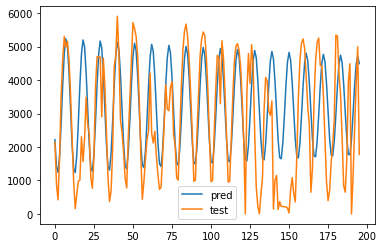

In [36]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(pred.values, label = 'pred')
plt.plot(test.values,label='test')
plt.legend()

# Prerocessing

# df2

In [37]:
df2 = pd.read_csv('df2.csv')
df2 = df2[['Time','Adresse','T1','P_DC']]
df2.head()
df2['Time']= pd.to_datetime(df2['Time'])
df2 = df2.set_index('Time')
df2.head()
df2 = df2.resample('1H').mean()
df2
df2 = df2.between_time('08:00','18:00')
df2 = df2[df2 >= 0]
df2.isna().sum()

Adresse    2100
T1         2113
P_DC       3052
dtype: int64

In [38]:
df2 = df2.dropna()
df2

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,126.0,16.345803,386.204100
2017-04-20 09:00:00,126.0,20.186780,1369.071900
2017-04-20 10:00:00,126.0,22.920427,1768.966333
2017-04-20 11:00:00,126.0,28.280737,3215.782333
2017-04-20 12:00:00,126.0,35.227200,4625.574333
...,...,...,...
2020-06-01 14:00:00,126.0,51.603443,66.625177
2020-06-01 15:00:00,126.0,46.546127,445.963263
2020-06-01 16:00:00,126.0,43.299690,1724.499980


Text(0, 0.5, 'Count')

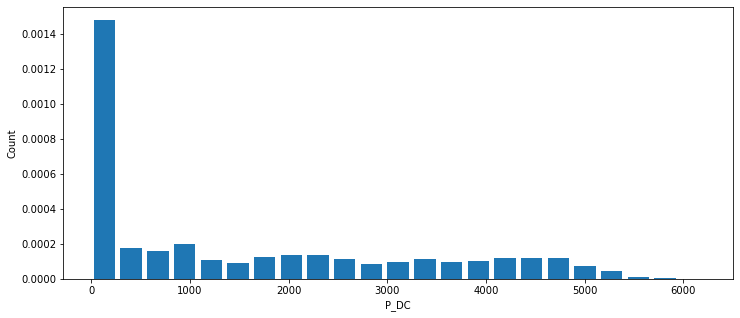

In [39]:
plt.figure(figsize=(12,5))
plt.hist(df2['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

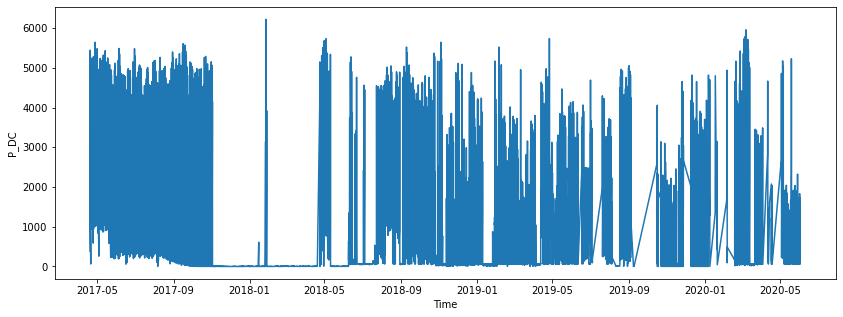

In [40]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df2.index ,y='P_DC' ,data=df2)

In [41]:
mask = (df2.index <= '2017-11-02')
df100 = df2.loc[mask]

In [42]:
mask = (df2.index >= '2018-04-20')
df101 = df2.loc[mask]

In [43]:
df2 = pd.concat([df100,df101])

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

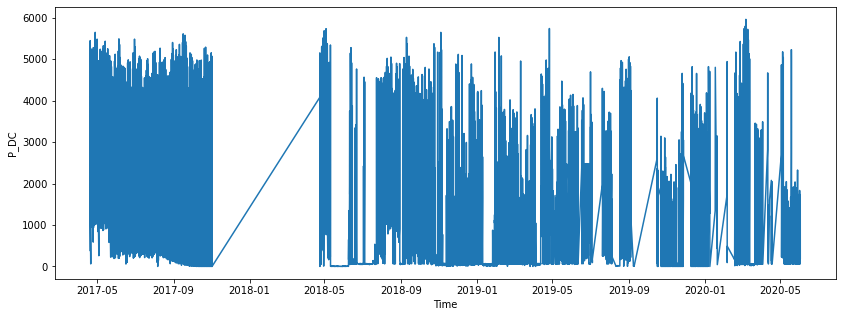

In [44]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df2.index ,y='P_DC' ,data=df2)

In [45]:
def clean_low(df,i,days_hours):
    df_test = df['P_DC'].resample('D').max()
    df_test = df_test.apply(lambda x : 0.0 if x < i else x)
    days = list(df_test[df_test == 0.0].index)

    for i in range(len(days)):
        j = str(days[i])
        j = j[:-8]
        days[i] = j

    hours = ['08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00']

    
    for i in days:
        for j in hours:
            days_hours.append(i+j)
    return days_hours  

In [46]:
days_hour = []
clean_low(df2, 1000,days_hour)

['2018-05-11 08:00:00',
 '2018-05-11 09:00:00',
 '2018-05-11 10:00:00',
 '2018-05-11 11:00:00',
 '2018-05-11 12:00:00',
 '2018-05-11 13:00:00',
 '2018-05-11 14:00:00',
 '2018-05-11 15:00:00',
 '2018-05-11 16:00:00',
 '2018-05-11 17:00:00',
 '2018-05-11 18:00:00',
 '2018-05-12 08:00:00',
 '2018-05-12 09:00:00',
 '2018-05-12 10:00:00',
 '2018-05-12 11:00:00',
 '2018-05-12 12:00:00',
 '2018-05-12 13:00:00',
 '2018-05-12 14:00:00',
 '2018-05-12 15:00:00',
 '2018-05-12 16:00:00',
 '2018-05-12 17:00:00',
 '2018-05-12 18:00:00',
 '2018-05-13 08:00:00',
 '2018-05-13 09:00:00',
 '2018-05-13 10:00:00',
 '2018-05-13 11:00:00',
 '2018-05-13 12:00:00',
 '2018-05-13 13:00:00',
 '2018-05-13 14:00:00',
 '2018-05-13 15:00:00',
 '2018-05-13 16:00:00',
 '2018-05-13 17:00:00',
 '2018-05-13 18:00:00',
 '2018-05-14 08:00:00',
 '2018-05-14 09:00:00',
 '2018-05-14 10:00:00',
 '2018-05-14 11:00:00',
 '2018-05-14 12:00:00',
 '2018-05-14 13:00:00',
 '2018-05-14 14:00:00',
 '2018-05-14 15:00:00',
 '2018-05-14 16:

In [47]:
for i in days_hour:
    df2 = df2[df2.index != i]

In [48]:
df2

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,126.0,16.345803,386.204100
2017-04-20 09:00:00,126.0,20.186780,1369.071900
2017-04-20 10:00:00,126.0,22.920427,1768.966333
2017-04-20 11:00:00,126.0,28.280737,3215.782333
2017-04-20 12:00:00,126.0,35.227200,4625.574333
...,...,...,...
2020-06-01 14:00:00,126.0,51.603443,66.625177
2020-06-01 15:00:00,126.0,46.546127,445.963263
2020-06-01 16:00:00,126.0,43.299690,1724.499980


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

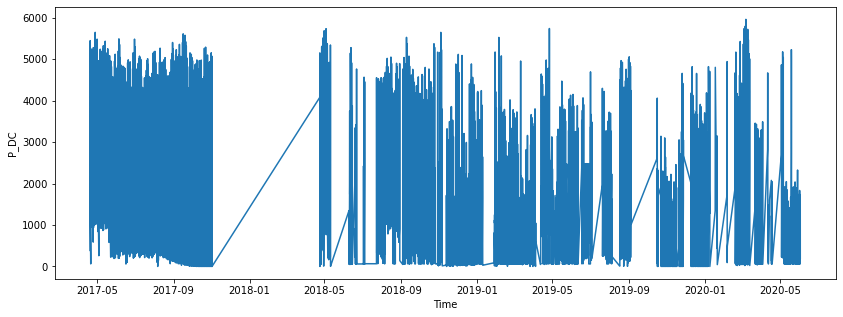

In [49]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df2.index ,y='P_DC' ,data=df2)

# Stationary test

In [50]:
dftest = adfuller(df2['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 1.4084183750613906e-06


# Autocorrelation_ PACF 

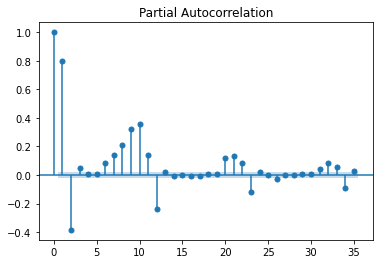

In [51]:
sm.graphics.tsa.plot_pacf(df2['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR  

In [52]:
df_AR1 = df2['P_DC']
train_size = int(len(df2) * 0.95)
test_size = len(df2) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df2)]
print(len(train), len(test))

6961 367


In [53]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 6961
Model:                     AutoReg(3)   Log Likelihood              -57495.583
Method:               Conditional MLE   S.D. of innovations            938.512
Date:                Thu, 12 Aug 2021   AIC                             13.690
Time:                        14:31:37   BIC                             13.695
Sample:                             3   HQIC                            13.692
                                 6961                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    560.9559     19.512     28.750      0.000     522.713     599.198
P_DC.L1        1.1214      0.012     93.599      0.000       1.098       1.145
P_DC.L2       -0.4330      0.017    -25.113      0.0

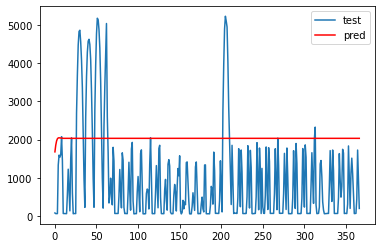

In [54]:
pred = model.predict(start = train_size, end = len(df2)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA

In [55]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=120132.486, Time=6.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=122958.731, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=122505.088, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=122341.351, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=122956.731, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=120354.726, Time=3.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=120416.944, Time=6.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=120055.073, Time=9.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=120567.010, Time=6.69 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=120033.612, Time=9.74 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=120332.297, Time=12.09 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.23 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=119362.152, Time=11.24 sec
 ARIMA(1,1,4)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7328
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -59673.108
Date:                Thu, 12 Aug 2021   AIC                         119360.216
Time:                        14:34:43   BIC                         119408.512
Sample:                             0   HQIC                        119376.820
                               - 7328                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6733      0.002    871.159      0.000       1.670       1.677
ar.L2         -0.9905      0.002   -487.229      0.000      -0.994      -0.986
ma.L1         -1.8932      0.009   -216.517      0.000      -1.910      -1.876
ma.L2          0.8590      0.020     43.466      0.000       0.820       0.898
ma.L3          0.5447      0.020     27.751      0.000       0.506       0.583
ma.L4         -0.4591      0.009    -53.175      0.000      -0.476      -0.442
sigma2      6.356e+05   7596.337     83.670      0.000    6.21e+05     6.5e+05
===================================================================================
Ljung-Box (L1) (Q):                  51.24   Jarque-Bera (JB):              1197.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model = ARIMA(train, order=(2,1,4)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.14856D+00    |proj g|=  1.26157D-02

At iterate    5    f=  8.14852D+00    |proj g|=  1.09990D-02


 This problem is unconstrained.



At iterate   10    f=  8.14845D+00    |proj g|=  5.89040D-04

At iterate   15    f=  8.14844D+00    |proj g|=  5.04468D-03

At iterate   20    f=  8.14843D+00    |proj g|=  6.02540D-04

At iterate   25    f=  8.14842D+00    |proj g|=  2.63913D-03

At iterate   30    f=  8.14842D+00    |proj g|=  2.54552D-04

At iterate   35    f=  8.14842D+00    |proj g|=  2.09077D-04

At iterate   40    f=  8.14842D+00    |proj g|=  2.32703D-05

At iterate   45    f=  8.14842D+00    |proj g|=  6.43396D-04

At iterate   50    f=  8.14842D+00    |proj g|=  1.66622D-04

At iterate   55    f=  8.14841D+00    |proj g|=  1.00844D-03

At iterate   60    f=  8.14841D+00    |proj g|=  1.01252D-05

At iterate   65    f=  8.14841D+00    |proj g|=  9.05942D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

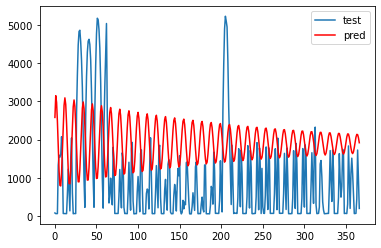

In [57]:
pred = model.predict(start= train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df3

In [58]:
df3 = pd.read_csv('df3.csv')
df3 = df3[['Time','Adresse','T1','P_DC']]
df3['Time']= pd.to_datetime(df3['Time'])
df3 = df3.set_index('Time')
df3 = df3.resample('1H').mean()
df3 = df3.between_time('08:00','18:00')
df3 = df3[df3 >= 0]
df3.isna().sum()

Adresse    5236
T1         5247
P_DC       5236
dtype: int64

In [59]:
df3 = df3.dropna()
df3

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,116.0,16.801183,610.915200
2017-04-20 09:00:00,116.0,19.812383,2031.624000
2017-04-20 10:00:00,116.0,21.770600,2615.184000
2017-04-20 11:00:00,116.0,26.224073,4652.704667
2017-04-20 12:00:00,116.0,31.480727,6724.931333
...,...,...,...
2020-06-01 14:00:00,116.0,47.939277,37.008370
2020-06-01 15:00:00,116.0,45.153887,590.207100
2020-06-01 16:00:00,116.0,41.238560,1387.706243


Text(0, 0.5, 'Count')

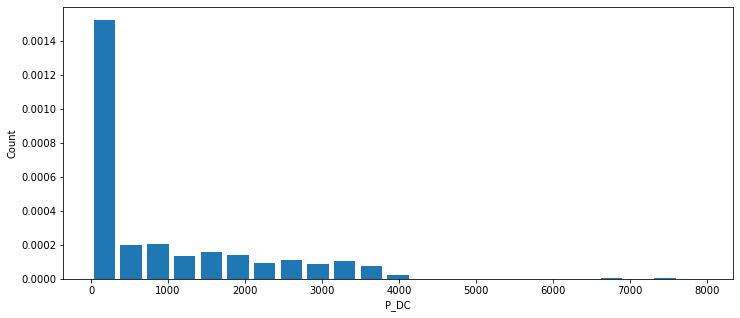

In [60]:
plt.figure(figsize=(12,5))
plt.hist(df3['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

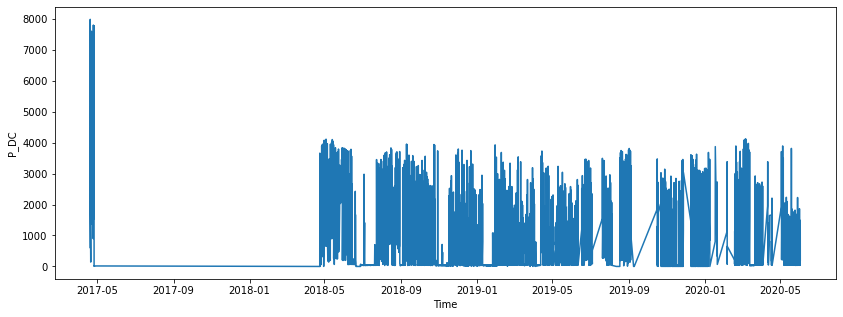

In [61]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df3.index ,y='P_DC' ,data=df3)

In [62]:
mask = (df3.index > '2018-04-20')
df3 = df3.loc[mask]

In [63]:
days_hour = []
clean_low(df3, 1000,days_hour)

['2018-04-20 08:00:00',
 '2018-04-20 09:00:00',
 '2018-04-20 10:00:00',
 '2018-04-20 11:00:00',
 '2018-04-20 12:00:00',
 '2018-04-20 13:00:00',
 '2018-04-20 14:00:00',
 '2018-04-20 15:00:00',
 '2018-04-20 16:00:00',
 '2018-04-20 17:00:00',
 '2018-04-20 18:00:00',
 '2018-06-15 08:00:00',
 '2018-06-15 09:00:00',
 '2018-06-15 10:00:00',
 '2018-06-15 11:00:00',
 '2018-06-15 12:00:00',
 '2018-06-15 13:00:00',
 '2018-06-15 14:00:00',
 '2018-06-15 15:00:00',
 '2018-06-15 16:00:00',
 '2018-06-15 17:00:00',
 '2018-06-15 18:00:00',
 '2018-06-16 08:00:00',
 '2018-06-16 09:00:00',
 '2018-06-16 10:00:00',
 '2018-06-16 11:00:00',
 '2018-06-16 12:00:00',
 '2018-06-16 13:00:00',
 '2018-06-16 14:00:00',
 '2018-06-16 15:00:00',
 '2018-06-16 16:00:00',
 '2018-06-16 17:00:00',
 '2018-06-16 18:00:00',
 '2018-06-17 08:00:00',
 '2018-06-17 09:00:00',
 '2018-06-17 10:00:00',
 '2018-06-17 11:00:00',
 '2018-06-17 12:00:00',
 '2018-06-17 13:00:00',
 '2018-06-17 14:00:00',
 '2018-06-17 15:00:00',
 '2018-06-17 16:

In [64]:
for i in days_hour:
    df3 = df3[df3.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

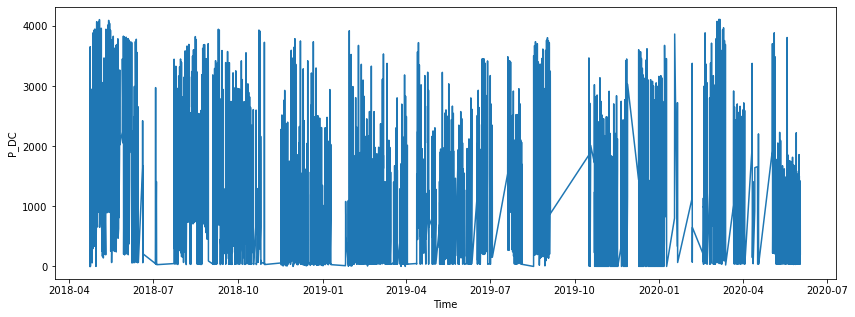

In [65]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df3.index ,y='P_DC' ,data=df3)

# Stationary test

In [66]:
dftest = adfuller(df3['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 4.756250415889439e-10


# Autocorrelation_ PACF 

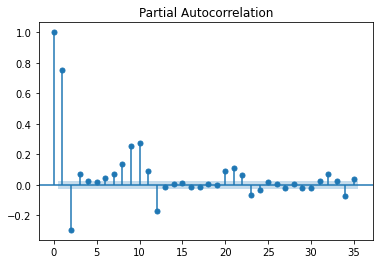

In [67]:
sm.graphics.tsa.plot_pacf(df3['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR  

In [68]:
df_AR1 = df3['P_DC']
train_size = int(len(df3) * 0.95)
test_size = len(df3) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df3)]
print(len(train), len(test))

4904 259


In [69]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4904
Model:                     AutoReg(3)   Log Likelihood              -39326.886
Method:               Conditional MLE   S.D. of innovations            739.016
Date:                Thu, 12 Aug 2021   AIC                             13.213
Time:                        14:35:45   BIC                             13.219
Sample:                             3   HQIC                            13.215
                                 4904                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    371.4795     16.806     22.105      0.000     338.541     404.418
P_DC.L1        0.9980      0.014     70.033      0.000       0.970       1.026
P_DC.L2       -0.3604      0.019    -18.498      0.0

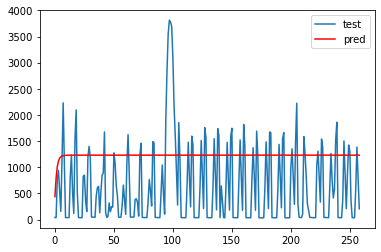

In [70]:
pred = model.predict(start = train_size, end = len(df3)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [71]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=82548.057, Time=5.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=83957.023, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83864.257, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=83803.364, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=83955.023, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=82647.144, Time=2.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=82546.892, Time=2.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=83757.949, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=83546.937, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=82548.381, Time=3.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=83411.111, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.89 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=82544.962, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=83755.947, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5163
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -41268.481
Date:                Thu, 12 Aug 2021   AIC                          82544.962
Time:                        14:36:17   BIC                          82571.158
Sample:                             0   HQIC                         82554.129
                               - 5163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9149      0.013     71.066      0.000       0.890       0.940
ar.L2         -0.3526      0.013    -27.659      0.000      -0.378      -0.328
ma.L1         -0.9642      0.004   -231.423      0.000      -0.972      -0.956
sigma2      5.148e+05   9909.151     51.953      0.000    4.95e+05    5.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                96.52
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
model = ARIMA(train, order=(2,1,1)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00232D+00    |proj g|=  2.57430D-03

At iterate    5    f=  8.00184D+00    |proj g|=  8.63309D-05


 This problem is unconstrained.



At iterate   10    f=  8.00183D+00    |proj g|=  1.78346D-04

At iterate   15    f=  8.00183D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   1.776D-07   8.002D+00
  F =   8.0018269684477765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 4903
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -39232.958
Method:                       css-mle   S.D. of innovations   

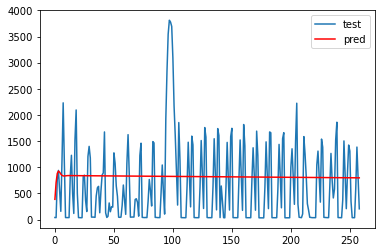

In [73]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df4

In [74]:
df4 = pd.read_csv('df4.csv')
df4 = df4[['Time','Adresse','T1','P_DC']]
df4['Time']= pd.to_datetime(df4['Time'])
df4 = df4.set_index('Time')
df4 = df4.resample('1H').mean()
df4 = df4.between_time('08:00','18:00')
df4 = df4[df4 >= 0]

In [75]:
df4.isna().sum()

Adresse    2100
T1         2101
P_DC       2114
dtype: int64

In [76]:
df4 = df4.dropna()
df4

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,117.0,17.057060,647.491000
2017-04-20 09:00:00,117.0,21.085960,2301.145667
2017-04-20 10:00:00,117.0,23.720537,2983.759000
2017-04-20 11:00:00,117.0,29.547053,5453.987000
2017-04-20 12:00:00,117.0,36.586837,8062.228000
...,...,...,...
2020-06-01 14:00:00,117.0,31.243193,7370.419667
2020-06-01 15:00:00,117.0,31.950220,5870.132667
2020-06-01 16:00:00,117.0,33.868030,4024.119333


Text(0, 0.5, 'Count')

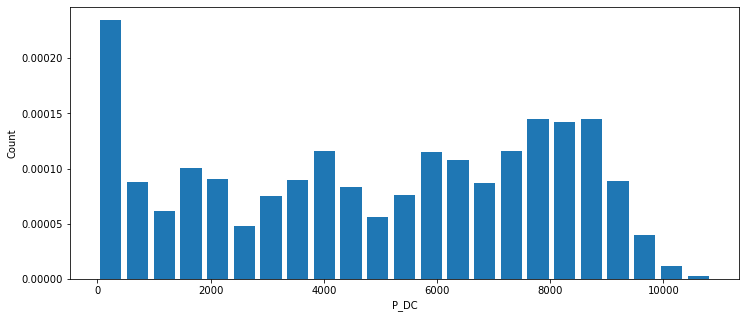

In [77]:
plt.figure(figsize=(12,5))
plt.hist(df4['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [78]:
days_hour = []
clean_low(df4, 1000,days_hour)

['2018-06-30 08:00:00',
 '2018-06-30 09:00:00',
 '2018-06-30 10:00:00',
 '2018-06-30 11:00:00',
 '2018-06-30 12:00:00',
 '2018-06-30 13:00:00',
 '2018-06-30 14:00:00',
 '2018-06-30 15:00:00',
 '2018-06-30 16:00:00',
 '2018-06-30 17:00:00',
 '2018-06-30 18:00:00',
 '2018-07-01 08:00:00',
 '2018-07-01 09:00:00',
 '2018-07-01 10:00:00',
 '2018-07-01 11:00:00',
 '2018-07-01 12:00:00',
 '2018-07-01 13:00:00',
 '2018-07-01 14:00:00',
 '2018-07-01 15:00:00',
 '2018-07-01 16:00:00',
 '2018-07-01 17:00:00',
 '2018-07-01 18:00:00',
 '2018-08-30 08:00:00',
 '2018-08-30 09:00:00',
 '2018-08-30 10:00:00',
 '2018-08-30 11:00:00',
 '2018-08-30 12:00:00',
 '2018-08-30 13:00:00',
 '2018-08-30 14:00:00',
 '2018-08-30 15:00:00',
 '2018-08-30 16:00:00',
 '2018-08-30 17:00:00',
 '2018-08-30 18:00:00',
 '2018-08-31 08:00:00',
 '2018-08-31 09:00:00',
 '2018-08-31 10:00:00',
 '2018-08-31 11:00:00',
 '2018-08-31 12:00:00',
 '2018-08-31 13:00:00',
 '2018-08-31 14:00:00',
 '2018-08-31 15:00:00',
 '2018-08-31 16:

In [79]:
for i in days_hour:
    df4 = df4[df4.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

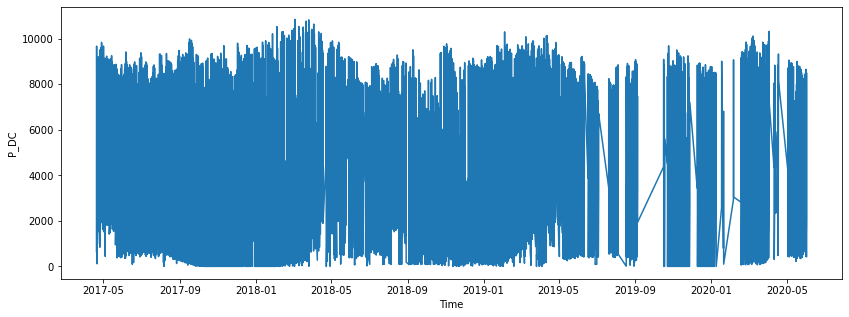

In [80]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df4.index ,y='P_DC' ,data=df4)

# Stationary test

In [81]:
dftest = adfuller(df4['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.5892266108390182e-17


# Autocorrelation_ PACF 

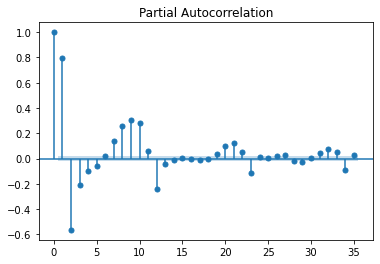

In [82]:
sm.graphics.tsa.plot_pacf(df4['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR 

In [83]:
df_AR1 = df4['P_DC']
train_size = int(len(df4) * 0.95)
test_size = len(df4) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df4)]
print(len(train), len(test))

9756 514


In [84]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 9756
Model:                     AutoReg(5)   Log Likelihood              -84870.087
Method:               Conditional MLE   S.D. of innovations           1457.959
Date:                Thu, 12 Aug 2021   AIC                             14.571
Time:                        14:37:36   BIC                             14.576
Sample:                             5   HQIC                            14.573
                                 9756                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2234.7233     44.251     50.502      0.000    2147.994    2321.453
P_DC.L1        1.1066      0.010    109.448      0.000       1.087       1.126
P_DC.L2       -0.3524      0.015    -23.354      0.0

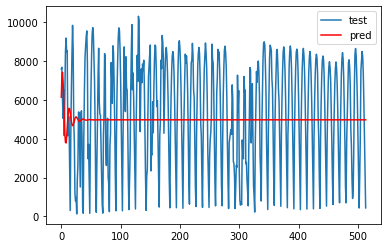

In [85]:
pred = model.predict(start = train_size, end = len(df4)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [86]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=177818.094, Time=21.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=184448.989, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=182609.961, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=182721.885, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=184446.989, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=182432.660, Time=10.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=18.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=177999.417, Time=26.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=177792.249, Time=20.70 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=27.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=177787.075, Time=38.88 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=177881.892, Time=32.83 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=176507.145, Time=36.60 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=176918.921, Time=33.12 sec
 ARIMA(4,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10270
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -88215.672
Date:                Thu, 12 Aug 2021   AIC                         176449.345
Time:                        14:45:35   BIC                         176514.477
Sample:                             0   HQIC                        176471.362
                              - 10270                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3653      0.481      0.760      0.447      -0.577       1.308
ar.L1          1.6737      0.001   1156.981      0.000       1.671       1.677
ar.L2         -0.9911      0.002   -649.748      0.000      -0.994      -0.988
ma.L1         -1.7874      0.007   -247.099      0.000      -1.802      -1.773
ma.L2          0.8298      0.015     54.806      0.000       0.800       0.859
ma.L3          0.1620      0.017      9.653      0.000       0.129       0.195
ma.L4          0.0544      0.016      3.304      0.001       0.022       0.087
ma.L5         -0.2221      0.008    -27.177      0.000      -0.238      -0.206
sigma2       1.65e+06      3e-06   5.51e+11      0.000    1.65e+06    1.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):              4049.31
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+26. Standard errors may be unstable.
"""

In [87]:
model = ARIMA(train, order=(2,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.58840D+00    |proj g|=  6.10161D-03


 This problem is unconstrained.



At iterate    5    f=  8.58838D+00    |proj g|=  1.42579D-02

At iterate   10    f=  8.58830D+00    |proj g|=  2.22720D-03

At iterate   15    f=  8.58828D+00    |proj g|=  7.28306D-05

At iterate   20    f=  8.58828D+00    |proj g|=  1.28537D-03

At iterate   25    f=  8.58828D+00    |proj g|=  1.76570D-04

At iterate   30    f=  8.58828D+00    |proj g|=  1.24345D-05

At iterate   35    f=  8.58828D+00    |proj g|=  1.13687D-04

At iterate   40    f=  8.58827D+00    |proj g|=  5.94902D-04

At iterate   45    f=  8.58827D+00    |proj g|=  5.37881D-04

At iterate   50    f=  8.58827D+00    |proj g|=  3.55271D-05

At iterate   55    f=  8.58827D+00    |proj g|=  3.01981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

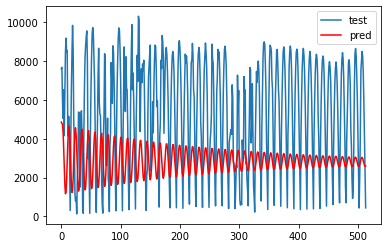

In [88]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df5

In [89]:
df5 = pd.read_csv('df5.csv')
df5 = df5[['Time','Adresse','T1','P_DC']]
df5['Time']= pd.to_datetime(df5['Time'])
df5 = df5.set_index('Time')
df5 = df5.resample('1H').mean()
df5 = df5.between_time('08:00','18:00')
df5 = df5[df5 >= 0]
df5.isna().sum()

Adresse    2100
T1         2105
P_DC       2472
dtype: int64

In [90]:
df5 = df5.dropna()
df5

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,118.0,16.681657,1026.518167
2017-04-20 09:00:00,118.0,19.502077,3444.295667
2017-04-20 10:00:00,118.0,21.488990,4460.593333
2017-04-20 11:00:00,118.0,25.631893,8059.817667
2017-04-20 12:00:00,118.0,31.070147,11927.970000
...,...,...,...
2020-06-01 14:00:00,118.0,33.523610,11211.356667
2020-06-01 15:00:00,118.0,34.684910,8805.656333
2020-06-01 16:00:00,118.0,34.901337,5602.024333


Text(0, 0.5, 'Count')

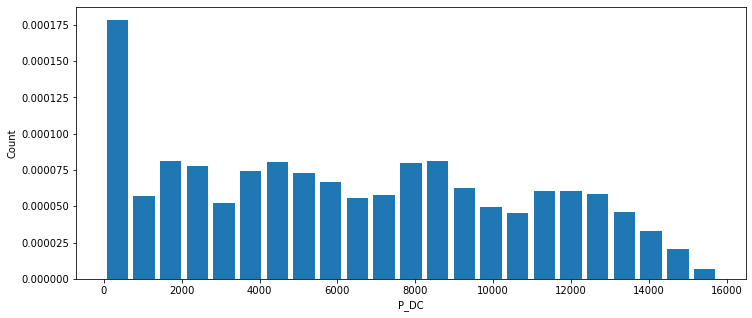

In [91]:
plt.figure(figsize=(12,5))
plt.hist(df5['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [92]:
days_hour = []
clean_low(df5, 2500,days_hour)

['2017-11-28 08:00:00',
 '2017-11-28 09:00:00',
 '2017-11-28 10:00:00',
 '2017-11-28 11:00:00',
 '2017-11-28 12:00:00',
 '2017-11-28 13:00:00',
 '2017-11-28 14:00:00',
 '2017-11-28 15:00:00',
 '2017-11-28 16:00:00',
 '2017-11-28 17:00:00',
 '2017-11-28 18:00:00',
 '2017-12-11 08:00:00',
 '2017-12-11 09:00:00',
 '2017-12-11 10:00:00',
 '2017-12-11 11:00:00',
 '2017-12-11 12:00:00',
 '2017-12-11 13:00:00',
 '2017-12-11 14:00:00',
 '2017-12-11 15:00:00',
 '2017-12-11 16:00:00',
 '2017-12-11 17:00:00',
 '2017-12-11 18:00:00',
 '2017-12-19 08:00:00',
 '2017-12-19 09:00:00',
 '2017-12-19 10:00:00',
 '2017-12-19 11:00:00',
 '2017-12-19 12:00:00',
 '2017-12-19 13:00:00',
 '2017-12-19 14:00:00',
 '2017-12-19 15:00:00',
 '2017-12-19 16:00:00',
 '2017-12-19 17:00:00',
 '2017-12-19 18:00:00',
 '2018-03-05 08:00:00',
 '2018-03-05 09:00:00',
 '2018-03-05 10:00:00',
 '2018-03-05 11:00:00',
 '2018-03-05 12:00:00',
 '2018-03-05 13:00:00',
 '2018-03-05 14:00:00',
 '2018-03-05 15:00:00',
 '2018-03-05 16:

In [93]:
for i in days_hour:
    df5 = df5[df5.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

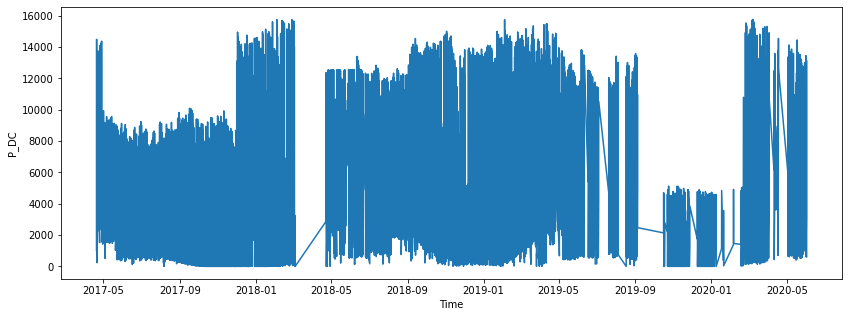

In [94]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df5.index ,y='P_DC' ,data=df5)

# Stationary test

In [95]:
dftest = adfuller(df5['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 4.4721136774773174e-10


# Autocorrelation_ PACF

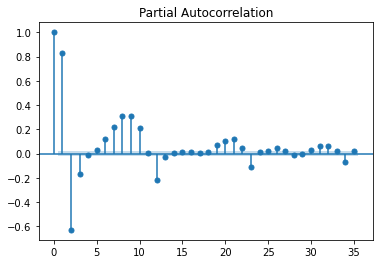

In [96]:
sm.graphics.tsa.plot_pacf(df5['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR  

In [97]:
df_AR1 = df5['P_DC']
train_size = int(len(df5) * 0.95)
test_size = len(df5) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df5)]
print(len(train), len(test))

9303 490


In [98]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 9303
Model:                     AutoReg(5)   Log Likelihood              -82873.330
Method:               Conditional MLE   S.D. of innovations           1797.387
Date:                Thu, 12 Aug 2021   AIC                             14.990
Time:                        14:47:02   BIC                             14.995
Sample:                             5   HQIC                            14.992
                                 9303                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1994.5676     49.588     40.223      0.000    1897.377    2091.758
P_DC.L1        1.2585      0.010    121.438      0.000       1.238       1.279
P_DC.L2       -0.4185      0.017    -25.125      0.0

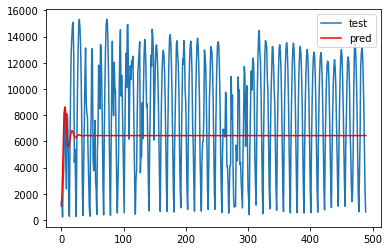

In [99]:
pred = model.predict(start = train_size, end = len(df5)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [100]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=173170.774, Time=7.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=180926.477, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=178217.879, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=178532.923, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=180924.477, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=174609.844, Time=6.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=173314.907, Time=8.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=173145.508, Time=10.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=173141.706, Time=14.64 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=173217.643, Time=14.40 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=172063.232, Time=16.33 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=172591.944, Time=10.99 sec
 ARIMA(4,1,4)(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9793
Model:               SARIMAX(3, 1, 5)   Log Likelihood              -85977.935
Date:                Thu, 12 Aug 2021   AIC                         171973.871
Time:                        14:51:26   BIC                         172038.575
Sample:                             0   HQIC                        171995.796
                               - 9793                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9555      0.026     73.955      0.000       1.904       2.007
ar.L2         -1.4632      0.044    -33.148      0.000      -1.550      -1.377
ar.L3          0.2789      0.026     10.701      0.000       0.228       0.330
ma.L1         -1.9706      0.026    -74.747      0.000      -2.022      -1.919
ma.L2          1.2014      0.047     25.470      0.000       1.109       1.294
ma.L3         -0.0770      0.025     -3.038      0.002      -0.127      -0.027
ma.L4          0.0493      0.020      2.473      0.013       0.010       0.088
ma.L5         -0.1750      0.012    -14.241      0.000      -0.199      -0.151
sigma2      2.403e+06   4.07e-09    5.9e+14      0.000     2.4e+06     2.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             10928.39
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.54e+30. Standard errors may be unstable.
"""

In [101]:
model = ARIMA(train, order=(3,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76823D+00    |proj g|=  8.22311D-03


 This problem is unconstrained.



At iterate    5    f=  8.76759D+00    |proj g|=  7.45555D-03

At iterate   10    f=  8.76713D+00    |proj g|=  1.52873D-03

At iterate   15    f=  8.76686D+00    |proj g|=  1.12212D-03

At iterate   20    f=  8.76685D+00    |proj g|=  2.34657D-04

At iterate   25    f=  8.76685D+00    |proj g|=  1.13687D-05

At iterate   30    f=  8.76685D+00    |proj g|=  7.95808D-05

At iterate   35    f=  8.76684D+00    |proj g|=  3.76232D-04

At iterate   40    f=  8.76684D+00    |proj g|=  1.27898D-05

At iterate   45    f=  8.76684D+00    |proj g|=  1.79412D-05

At iterate   50    f=  8.76684D+00    |proj g|=  1.31450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

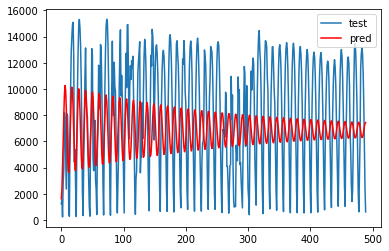

In [102]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df6

In [103]:
df6 = pd.read_csv('df6.csv')
df6 = df6[['Time','Adresse','T1','P_DC']]
df6['Time']= pd.to_datetime(df6['Time'])
df6 = df6.set_index('Time')
df6 = df6.resample('1H').mean()
df6 = df6.between_time('08:00','18:00')
df6 = df6[df6 >= 0]
df6.isna().sum()

Adresse    2100
T1         2109
P_DC       2891
dtype: int64

In [104]:
df6 = df6.dropna()
df6

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,119.0,17.029307,387.415000
2017-04-20 09:00:00,119.0,20.307003,1322.002793
2017-04-20 10:00:00,119.0,22.793883,1699.054333
2017-04-20 11:00:00,119.0,27.560307,3192.866667
2017-04-20 12:00:00,119.0,33.359870,4749.039000
...,...,...,...
2020-06-01 14:00:00,119.0,48.044317,4491.259000
2020-06-01 15:00:00,119.0,45.391480,3425.523667
2020-06-01 16:00:00,119.0,41.742963,2194.009667


Text(0, 0.5, 'Count')

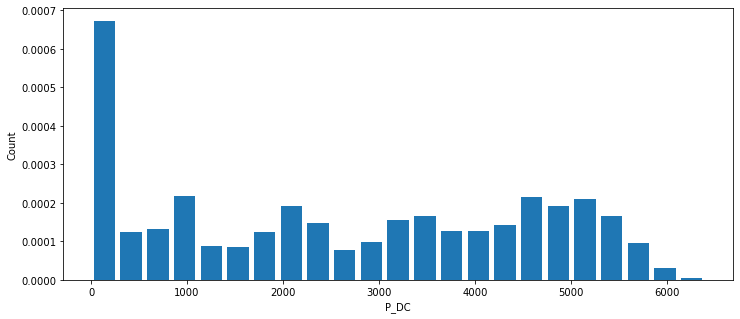

In [105]:
plt.figure(figsize=(12,5))
plt.hist(df6['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [106]:
days_hour = []
clean_low(df6, 1000,days_hour)

['2017-09-30 08:00:00',
 '2017-09-30 09:00:00',
 '2017-09-30 10:00:00',
 '2017-09-30 11:00:00',
 '2017-09-30 12:00:00',
 '2017-09-30 13:00:00',
 '2017-09-30 14:00:00',
 '2017-09-30 15:00:00',
 '2017-09-30 16:00:00',
 '2017-09-30 17:00:00',
 '2017-09-30 18:00:00',
 '2017-10-01 08:00:00',
 '2017-10-01 09:00:00',
 '2017-10-01 10:00:00',
 '2017-10-01 11:00:00',
 '2017-10-01 12:00:00',
 '2017-10-01 13:00:00',
 '2017-10-01 14:00:00',
 '2017-10-01 15:00:00',
 '2017-10-01 16:00:00',
 '2017-10-01 17:00:00',
 '2017-10-01 18:00:00',
 '2017-10-02 08:00:00',
 '2017-10-02 09:00:00',
 '2017-10-02 10:00:00',
 '2017-10-02 11:00:00',
 '2017-10-02 12:00:00',
 '2017-10-02 13:00:00',
 '2017-10-02 14:00:00',
 '2017-10-02 15:00:00',
 '2017-10-02 16:00:00',
 '2017-10-02 17:00:00',
 '2017-10-02 18:00:00',
 '2017-10-03 08:00:00',
 '2017-10-03 09:00:00',
 '2017-10-03 10:00:00',
 '2017-10-03 11:00:00',
 '2017-10-03 12:00:00',
 '2017-10-03 13:00:00',
 '2017-10-03 14:00:00',
 '2017-10-03 15:00:00',
 '2017-10-03 16:

In [107]:
for i in days_hour:
    df6 = df6[df6.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

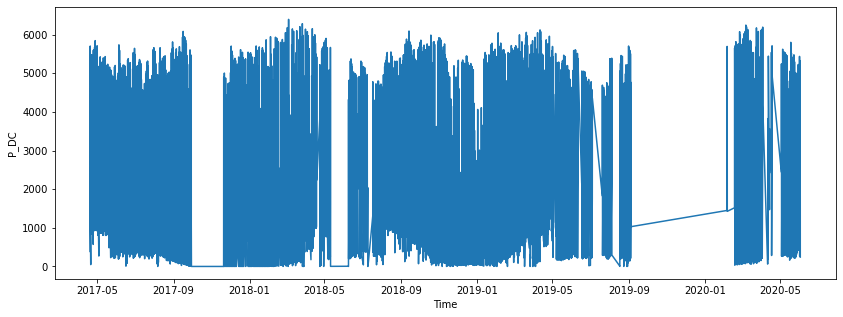

In [108]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df6.index ,y='P_DC' ,data=df6)

# Stationary test

In [109]:
dftest = adfuller(df6['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 1.2511399764375982e-17


 # Autocorrelation_ PACF

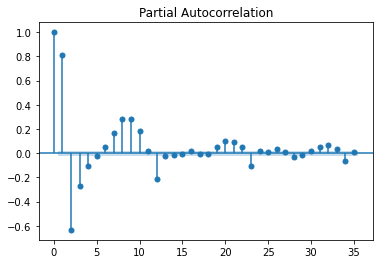

In [110]:
sm.graphics.tsa.plot_pacf(df6['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR 

In [111]:
df_AR1 = df6['P_DC']
train_size = int(len(df6) * 0.95)
test_size = len(df6) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df6)]
print(len(train), len(test))

8170 431


In [112]:
model = AutoReg(train, lags = 6).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 8170
Model:                     AutoReg(6)   Log Likelihood              -65888.000
Method:               Conditional MLE   S.D. of innovations            774.033
Date:                Thu, 12 Aug 2021   AIC                             13.305
Time:                        14:52:57   BIC                             13.312
Sample:                             6   HQIC                            13.308
                                 8170                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1202.3442     30.401     39.549      0.000    1142.759    1261.929
P_DC.L1        1.1359      0.011    102.762      0.000       1.114       1.158
P_DC.L2       -0.3176      0.017    -18.991      0.0

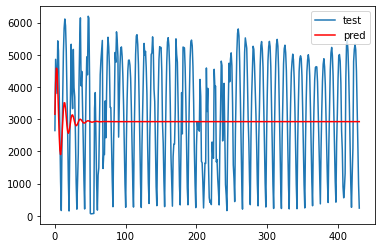

In [113]:
pred = model.predict(start = train_size, end = len(df6)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [114]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=138145.057, Time=7.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=144967.245, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=142718.980, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=143050.947, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=144965.245, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.82 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=138187.594, Time=7.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=138064.916, Time=7.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=138066.704, Time=8.51 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=137585.866, Time=10.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=9.88 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=137165.357, Time=13.95 sec
 ARIMA(4,1,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8601
Model:               SARIMAX(3, 1, 5)   Log Likelihood              -68557.159
Date:                Thu, 12 Aug 2021   AIC                         137132.317
Time:                        14:56:34   BIC                         137195.853
Sample:                             0   HQIC                        137153.986
                               - 8601                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0508      0.031     65.167      0.000       1.989       2.113
ar.L2         -1.6221      0.052    -30.932      0.000      -1.725      -1.519
ar.L3          0.3735      0.031     12.076      0.000       0.313       0.434
ma.L1         -2.1097      0.032    -66.329      0.000      -2.172      -2.047
ma.L2          1.4690      0.058     25.390      0.000       1.356       1.582
ma.L3         -0.2292      0.032     -7.227      0.000      -0.291      -0.167
ma.L4          0.0141      0.024      0.585      0.558      -0.033       0.061
ma.L5         -0.1261      0.015     -8.324      0.000      -0.156      -0.096
sigma2      4.849e+05   4935.264     98.255      0.000    4.75e+05    4.95e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7437.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
model = ARIMA(train, order=(3,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96845D+00    |proj g|=  7.55014D-03


 This problem is unconstrained.



At iterate    5    f=  7.96736D+00    |proj g|=  1.16804D-02

At iterate   10    f=  7.96626D+00    |proj g|=  6.19007D-03

At iterate   15    f=  7.96588D+00    |proj g|=  7.80069D-03

At iterate   20    f=  7.96579D+00    |proj g|=  1.92140D-03

At iterate   25    f=  7.96570D+00    |proj g|=  1.30266D-02

At iterate   30    f=  7.96569D+00    |proj g|=  6.45883D-04

At iterate   35    f=  7.96569D+00    |proj g|=  5.20473D-05

At iterate   40    f=  7.96568D+00    |proj g|=  1.43086D-04

At iterate   45    f=  7.96568D+00    |proj g|=  1.42792D-03

At iterate   50    f=  7.96568D+00    |proj g|=  7.01661D-05

At iterate   55    f=  7.96568D+00    |proj g|=  3.10951D-04

At iterate   60    f=  7.96568D+00    |proj g|=  7.92255D-05

At iterate   65    f=  7.96568D+00    |proj g|=  2.95763D-05

At iterate   70    f=  7.96568D+00    |proj g|=  1.54543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

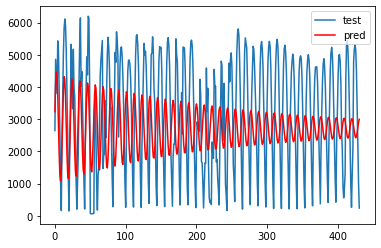

In [116]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df7

In [117]:
df7 = pd.read_csv('df7.csv')
df7 = df7[['Time','Adresse','T1','P_DC']]
df7['Time']= pd.to_datetime(df7['Time'])
df7 = df7.set_index('Time')
df7 = df7.resample('1H').mean()
df7 = df7.between_time('08:00','18:00')
df7 = df7[df7 >= 0]
df7.isna().sum()

Adresse    2100
T1         2108
P_DC       2158
dtype: int64

In [118]:
df7 = df7.dropna()
df7

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,120.0,16.727000,271.481767
2017-04-20 09:00:00,120.0,19.638576,989.085724
2017-04-20 10:00:00,120.0,21.685783,1279.716367
2017-04-20 11:00:00,120.0,25.969890,2353.997333
2017-04-20 12:00:00,120.0,31.594667,3455.033667
...,...,...,...
2020-06-01 14:00:00,120.0,32.391460,0.000000
2020-06-01 15:00:00,120.0,33.137923,0.000000
2020-06-01 16:00:00,120.0,33.593710,0.000000


Text(0, 0.5, 'Count')

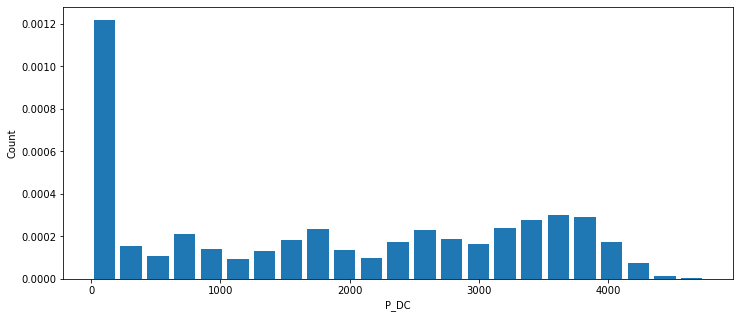

In [119]:
plt.figure(figsize=(12,5))
plt.hist(df7['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

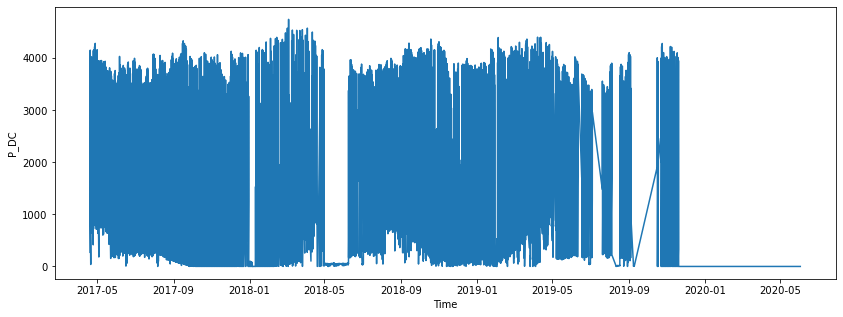

In [120]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df7.index ,y='P_DC' ,data=df7)

In [121]:
mask = (df7.index < '2019-12-01')
df7 = df7.loc[mask]

In [122]:
days_hour = []
clean_low(df7, 1000,days_hour)
for i in days_hour:
    df7 = df7[df7.index != i]
df7

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,120.0,16.727000,271.481767
2017-04-20 09:00:00,120.0,19.638576,989.085724
2017-04-20 10:00:00,120.0,21.685783,1279.716367
2017-04-20 11:00:00,120.0,25.969890,2353.997333
2017-04-20 12:00:00,120.0,31.594667,3455.033667
...,...,...,...
2019-11-19 14:00:00,120.0,19.602207,80.057300
2019-11-19 15:00:00,120.0,17.642517,0.000000
2019-11-19 16:00:00,120.0,16.107527,0.000000


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

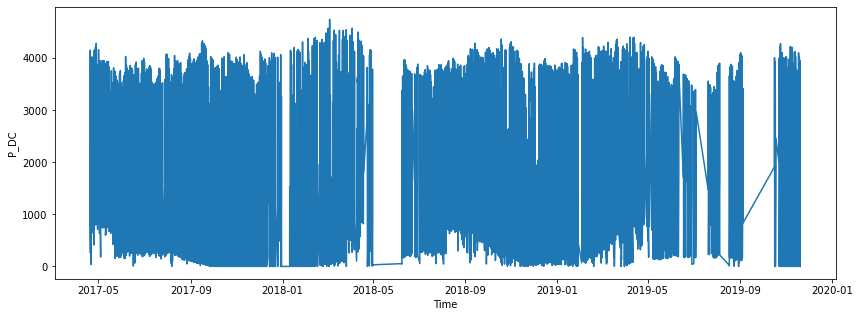

In [123]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df7.index ,y='P_DC' ,data=df7)

# Stationary test

In [124]:
dftest = adfuller(df7['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 6.039274999653486e-20


 # Autocorrelation_ PACF  

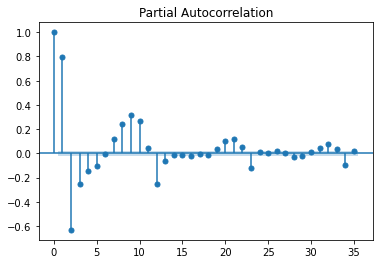

In [125]:
sm.graphics.tsa.plot_pacf(df7['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR   

In [257]:
df_AR1 = df7['P_DC']
train_size = int(len(df7) * 0.95)
test_size = len(df7) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df7)]
print(len(train), len(test))

8039 424


In [127]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 8039
Model:                     AutoReg(5)   Log Likelihood              -62449.365
Method:               Conditional MLE   S.D. of innovations            574.900
Date:                Thu, 12 Aug 2021   AIC                             12.710
Time:                        14:58:04   BIC                             12.716
Sample:                             5   HQIC                            12.712
                                 8039                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1156.9628     22.086     52.385      0.000    1113.675    1200.250
P_DC.L1        1.0930      0.011     98.362      0.000       1.071       1.115
P_DC.L2       -0.3518      0.016    -21.332      0.0

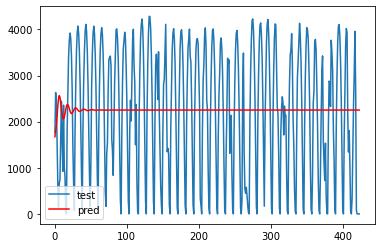

In [128]:
pred = model.predict(start = train_size, end = len(df7)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA

In [129]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=131113.328, Time=7.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=137641.062, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=135568.871, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=135779.522, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=137639.062, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=135360.677, Time=3.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=131209.031, Time=9.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=135488.850, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=131763.714, Time=6.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=131003.242, Time=10.92 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=130673.020, Time=13.99 sec
 ARIMA(4,1,2)(0,0,0)[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8463
Model:               SARIMAX(4, 1, 4)   Log Likelihood              -65055.788
Date:                Thu, 12 Aug 2021   AIC                         130131.576
Time:                        15:01:55   BIC                         130202.010
Sample:                             0   HQIC                        130155.617
                               - 8463                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0317      0.040     -0.801      0.423      -0.109       0.046
ar.L1          1.4026      0.011    132.689      0.000       1.382       1.423
ar.L2          0.1582      0.015     10.799      0.000       0.129       0.187
ar.L3         -1.4307      0.015    -97.670      0.000      -1.459      -1.402
ar.L4          0.6856      0.010     66.601      0.000       0.665       0.706
ma.L1         -1.6038      0.007   -215.278      0.000      -1.618      -1.589
ma.L2         -0.1104      0.012     -9.133      0.000      -0.134      -0.087
ma.L3          1.5696      0.012    132.608      0.000       1.546       1.593
ma.L4         -0.8488      0.006   -139.089      0.000      -0.861      -0.837
sigma2      2.604e+05   2842.955     91.601      0.000    2.55e+05    2.66e+05
===================================================================================
Ljung-Box (L1) (Q):                  86.83   Jarque-Bera (JB):              4193.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [261]:
model = ARIMA(train, order=(2,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66595D+00    |proj g|=  9.13962D-03


 This problem is unconstrained.



At iterate    5    f=  7.66562D+00    |proj g|=  3.56799D-03

At iterate   10    f=  7.66557D+00    |proj g|=  5.68434D-05

At iterate   15    f=  7.66557D+00    |proj g|=  2.00204D-03

At iterate   20    f=  7.66557D+00    |proj g|=  1.29496D-04

At iterate   25    f=  7.66557D+00    |proj g|=  2.54818D-04

At iterate   30    f=  7.66557D+00    |proj g|=  1.50280D-04

At iterate   35    f=  7.66557D+00    |proj g|=  1.59961D-04

At iterate   40    f=  7.66557D+00    |proj g|=  4.97380D-05

At iterate   45    f=  7.66557D+00    |proj g|=  1.33227D-05

At iterate   50    f=  7.66557D+00    |proj g|=  2.87770D-05

At iterate   55    f=  7.66557D+00    |proj g|=  1.89182D-05

At iterate   60    f=  7.66557D+00    |proj g|=  3.58824D-05

At iterate   65    f=  7.66557D+00    |proj g|=  2.30926D-06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     69    123      2     0     0   4.352D-06   7.666D+00
  F =   7.6655691945515372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 8038
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -61615.845
Method:                       css-mle   S.D. of innovations            516.099
Date:                Thu, 12 Aug 2021   AIC                         123249.690
Time:                       

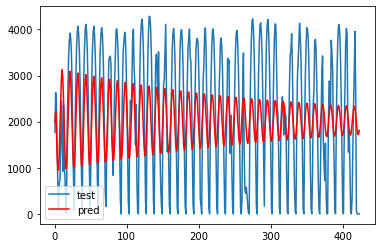

In [262]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df8

In [132]:
df8 = pd.read_csv('df8.csv')
df8 = df8[['Time','Adresse','T1','P_DC']]
df8['Time']= pd.to_datetime(df8['Time'])
df8 = df8.set_index('Time')
df8 = df8.resample('1H').mean()
df8 = df8.between_time('08:00','18:00')
df8 = df8[df8 >= 0]
df8.isna().sum()

Adresse    2100
T1         2102
P_DC       2233
dtype: int64

In [133]:
df8 = df8.dropna()
df8

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,122.0,17.182603,306.391200
2017-04-20 09:00:00,122.0,20.784786,1059.723069
2017-04-20 10:00:00,122.0,23.763507,1359.848233
2017-04-20 11:00:00,122.0,29.108287,2544.040667
2017-04-20 12:00:00,122.0,35.580040,3742.613333
...,...,...,...
2020-06-01 14:00:00,122.0,33.626543,4176.695667
2020-06-01 15:00:00,122.0,33.243060,3195.955667
2020-06-01 16:00:00,122.0,33.319587,2038.757667


Text(0, 0.5, 'Count')

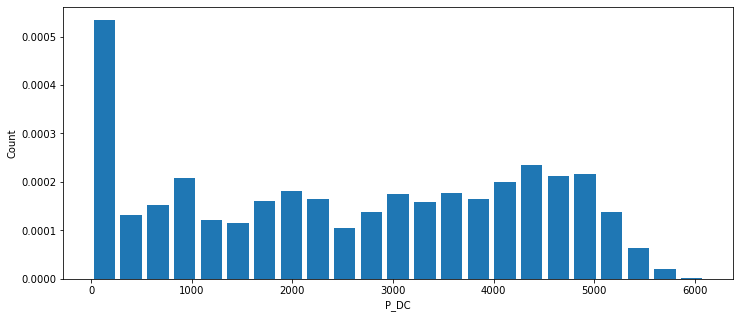

In [134]:
plt.figure(figsize=(12,5))
plt.hist(df8['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [135]:
days_hour = []
clean_low(df8, 1000,days_hour)
for i in days_hour:
    df8 = df8[df8.index != i]
df8

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,122.0,17.182603,306.391200
2017-04-20 09:00:00,122.0,20.784786,1059.723069
2017-04-20 10:00:00,122.0,23.763507,1359.848233
2017-04-20 11:00:00,122.0,29.108287,2544.040667
2017-04-20 12:00:00,122.0,35.580040,3742.613333
...,...,...,...
2020-06-01 14:00:00,122.0,33.626543,4176.695667
2020-06-01 15:00:00,122.0,33.243060,3195.955667
2020-06-01 16:00:00,122.0,33.319587,2038.757667


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

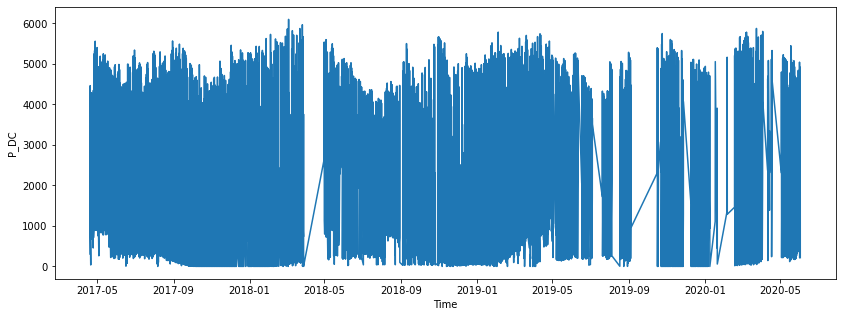

In [136]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df8.index ,y='P_DC' ,data=df8)

 # Stationary test

In [137]:
dftest = adfuller(df8['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.1497109666892722e-16


  # Autocorrelation_ PACF  

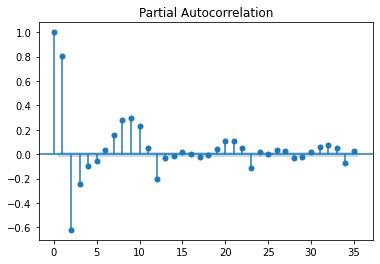

In [138]:
sm.graphics.tsa.plot_pacf(df8['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR   

In [263]:
df_AR1 = df8['P_DC']
train_size = int(len(df8) * 0.95)
test_size = len(df8) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df8)]
print(len(train), len(test))

9415 496


In [140]:
model = AutoReg(train, lags = 4).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 9415
Model:                     AutoReg(4)   Log Likelihood              -75682.736
Method:               Conditional MLE   S.D. of innovations            752.202
Date:                Thu, 12 Aug 2021   AIC                             13.247
Time:                        15:03:24   BIC                             13.252
Sample:                             4   HQIC                            13.249
                                 9415                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1156.5563     20.341     56.858      0.000    1116.689    1196.424
P_DC.L1        1.1329      0.010    110.477      0.000       1.113       1.153
P_DC.L2       -0.3407      0.015    -21.997      0.0

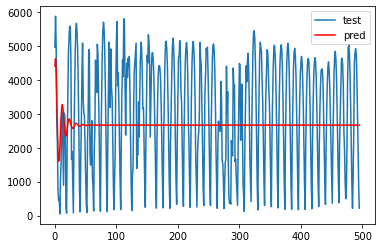

In [141]:
pred = model.predict(start = train_size, end = len(df8)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [142]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=158445.084, Time=8.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=166064.957, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=163673.311, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=163960.407, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=166062.957, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=163459.868, Time=1.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=158632.686, Time=12.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=158432.607, Time=15.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=158437.459, Time=13.35 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=157774.571, Time=13.02 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.36 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=157280.013, Time=14.44 sec
 ARIMA(4,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9911
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -78615.215
Date:                Thu, 12 Aug 2021   AIC                         157248.430
Time:                        15:06:47   BIC                         157313.242
Sample:                             0   HQIC                        157270.379
                               - 9911                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0791      0.230     -0.344      0.731      -0.530       0.372
ar.L1          1.6732      0.002    954.754      0.000       1.670       1.677
ar.L2         -0.9911      0.002   -546.532      0.000      -0.995      -0.988
ma.L1         -1.7681      0.007   -246.369      0.000      -1.782      -1.754
ma.L2          0.8171      0.014     56.351      0.000       0.789       0.845
ma.L3          0.1195      0.016      7.306      0.000       0.087       0.152
ma.L4          0.1003      0.016      6.203      0.000       0.069       0.132
ma.L5         -0.2361      0.008    -29.270      0.000      -0.252      -0.220
sigma2      4.499e+05   4343.201    103.596      0.000    4.41e+05    4.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.90   Jarque-Bera (JB):              8337.83
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [268]:
model = ARIMA(train, order=(2,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92931D+00    |proj g|=  4.27702D-03


 This problem is unconstrained.



At iterate    5    f=  7.92929D+00    |proj g|=  1.34201D-02

At iterate   10    f=  7.92923D+00    |proj g|=  2.06368D-03

At iterate   15    f=  7.92920D+00    |proj g|=  2.95133D-03

At iterate   20    f=  7.92919D+00    |proj g|=  2.84217D-05

At iterate   25    f=  7.92919D+00    |proj g|=  9.65450D-05

At iterate   30    f=  7.92919D+00    |proj g|=  1.05427D-04

At iterate   35    f=  7.92919D+00    |proj g|=  3.97105D-04

At iterate   40    f=  7.92919D+00    |proj g|=  7.72715D-06

At iterate   45    f=  7.92919D+00    |proj g|=  2.13163D-06

At iterate   50    f=  7.92919D+00    |proj g|=  9.76996D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

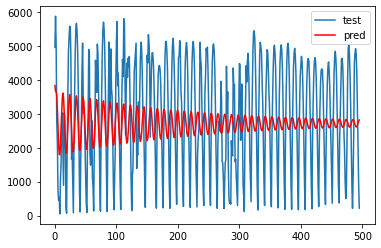

In [269]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df9

In [145]:
df9 = pd.read_csv('df9.csv')
df9 = df9[['Time','Adresse','T1','P_DC']]
df9['Time']= pd.to_datetime(df9['Time'])
df9 = df9.set_index('Time')
df9 = df9.resample('1H').mean()
df9 = df9.between_time('08:00','18:00')
df9 = df9[df9 >= 0]
df9.isna().sum()

Adresse    2100
T1         2110
P_DC       4438
dtype: int64

In [146]:
df9 = df9.dropna()
df9

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,125.0,17.165667,839.030067
2017-04-20 09:00:00,125.0,21.134869,2832.072759
2017-04-20 10:00:00,125.0,23.237013,3407.287000
2017-04-20 11:00:00,125.0,28.929960,5819.508667
2017-04-20 12:00:00,125.0,35.181963,8266.258667
...,...,...,...
2020-06-01 14:00:00,125.0,48.882783,92.852770
2020-06-01 15:00:00,125.0,45.916930,735.357220
2020-06-01 16:00:00,125.0,42.618343,2084.128820


Text(0, 0.5, 'Count')

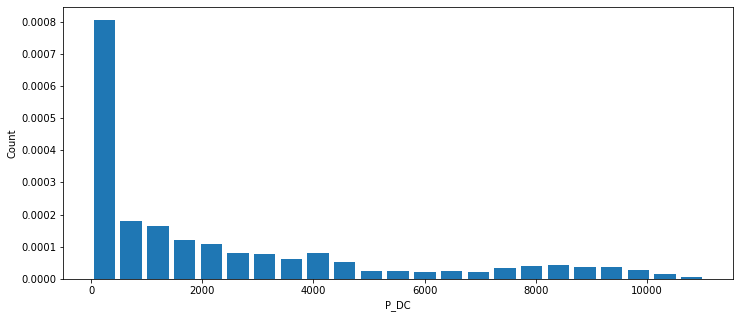

In [147]:
plt.figure(figsize=(12,5))
plt.hist(df9['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

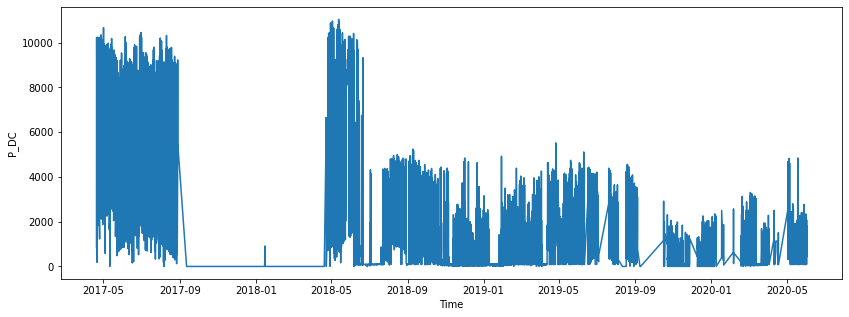

In [148]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df9.index ,y='P_DC' ,data=df9)

In [149]:
days_hour = []
clean_low(df9, 1800,days_hour)
for i in days_hour:
    df9 = df9[df9.index != i]
df9

,Adresse,T1,P_DC
Time,,,
2017-04-20 08:00:00,125.0,17.165667,839.030067
2017-04-20 09:00:00,125.0,21.134869,2832.072759
2017-04-20 10:00:00,125.0,23.237013,3407.287000
2017-04-20 11:00:00,125.0,28.929960,5819.508667
2017-04-20 12:00:00,125.0,35.181963,8266.258667
...,...,...,...
2020-06-01 14:00:00,125.0,48.882783,92.852770
2020-06-01 15:00:00,125.0,45.916930,735.357220
2020-06-01 16:00:00,125.0,42.618343,2084.128820


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

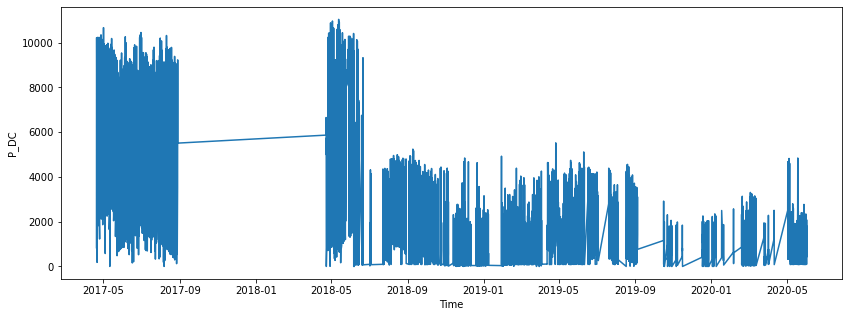

In [150]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df9.index ,y='P_DC' ,data=df9)

  # Stationary test

In [151]:
dftest = adfuller(df9['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 0.03384118514699092


 # Autocorrelation_ PACF  

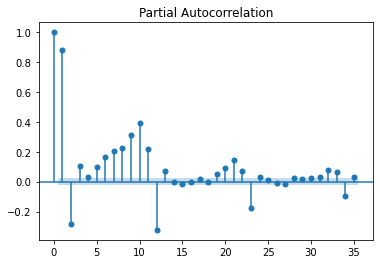

In [152]:
sm.graphics.tsa.plot_pacf(df9['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [153]:
df_AR1 = df9['P_DC']
train_size = int(len(df9) * 0.95)
test_size = len(df9) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df9)]
print(len(train), len(test))

5647 298


In [154]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 5647
Model:                     AutoReg(5)   Log Likelihood              -48721.324
Method:               Conditional MLE   S.D. of innovations           1361.758
Date:                Thu, 12 Aug 2021   AIC                             14.436
Time:                        15:08:09   BIC                             14.444
Sample:                             5   HQIC                            14.438
                                 5647                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    383.6070     28.730     13.352      0.000     327.297     439.917
P_DC.L1        1.1546      0.013     87.154      0.000       1.129       1.181
P_DC.L2       -0.3923      0.020    -19.353      0.0

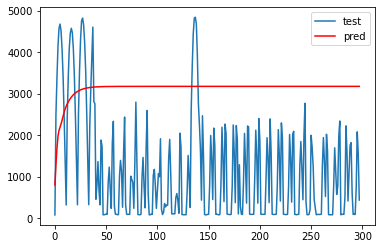

In [155]:
pred = model.predict(start = train_size, end = len(df9)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [156]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=101233.838, Time=4.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=103487.925, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=103230.365, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=103133.587, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=103485.925, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=101908.715, Time=2.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=101636.763, Time=3.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=101316.567, Time=6.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=101940.379, Time=8.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=103111.069, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=101814.143, Time=3.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=101593.039, Time=5.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=101149.779, Time=7.71 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=101450.242, Time=9.54 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5945
Model:               SARIMAX(3, 1, 4)   Log Likelihood              -50207.484
Date:                Thu, 12 Aug 2021   AIC                         100432.969
Time:                        15:10:18   BIC                         100493.180
Sample:                             0   HQIC                        100453.888
                               - 5945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0782      0.469     -4.431      0.000      -2.997      -1.159
ar.L1          1.9075      0.017    115.188      0.000       1.875       1.940
ar.L2         -1.3806      0.028    -49.668      0.000      -1.435      -1.326
ar.L3          0.2284      0.016     13.878      0.000       0.196       0.261
ma.L1         -2.1059      0.017   -122.899      0.000      -2.139      -2.072
ma.L2          1.3039      0.038     34.063      0.000       1.229       1.379
ma.L3          0.2149      0.033      6.531      0.000       0.150       0.279
ma.L4         -0.3776      0.011    -34.878      0.000      -0.399      -0.356
sigma2      1.074e+06   1.91e-06   5.63e+11      0.000    1.07e+06    1.07e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              4748.97
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.45e+26. Standard errors may be unstable.
"""

In [157]:
model = ARIMA(train, order=(3,1,4)).fit()
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45531D+00    |proj g|=  3.35323D-02

At iterate    5    f=  8.45338D+00    |proj g|=  1.07260D-02

At iterate   10    f=  8.45206D+00    |proj g|=  9.50031D-03

At iterate   15    f=  8.45164D+00    |proj g|=  3.01252D-03

At iterate   20    f=  8.45150D+00    |proj g|=  8.60467D-04

At iterate   25    f=  8.45149D+00    |proj g|=  5.15143D-05

At iterate   30    f=  8.45149D+00    |proj g|=  6.99885D-05

At iterate   35    f=  8.45149D+00    |proj g|=  9.55680D-05

At iterate   40    f=  8.45149D+00    |proj g|=  6.19949D-04

At iterate   45    f=  8.45149D+00    |proj g|=  9.43245D-05

At iterate   50    f=  8.45149D+00    |proj g|=  3.60068D-04

At iterate   55    f=  8.45149D+00    |proj g|=  2.36078D-04

At iterate   60    f=  8.45149D+00    |proj g|=  6.23679D-04

At iterate   65    f=  8.4

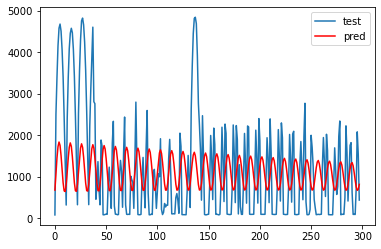

In [158]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df12

In [159]:
df12 = pd.read_csv('df12.csv')
df12 = df12[['Time','Adresse','T1','P_DC']]
df12['Time']= pd.to_datetime(df12['Time'])
df12 = df12.set_index('Time')
df12 = df12.resample('1H').mean()
df12 = df12.between_time('08:00','18:00')
df12 = df12[df12 >= 0]
df12.isna().sum()

Adresse    2100
T1         2105
P_DC       2100
dtype: int64

In [160]:
df12 = df12.dropna()
df12

,Adresse,T1,P_DC
Time,,,
2017-04-27 09:00:00,115.0,28.054865,3835.302692
2017-04-27 10:00:00,115.0,35.083490,5636.146000
2017-04-27 11:00:00,115.0,38.760443,6879.307333
2017-04-27 12:00:00,115.0,42.322620,7600.742667
2017-04-27 13:00:00,115.0,41.930120,7880.254000
...,...,...,...
2020-06-01 14:00:00,115.0,33.094297,106.507467
2020-06-01 15:00:00,115.0,33.410037,662.250200
2020-06-01 16:00:00,115.0,33.424997,1395.717700


Text(0, 0.5, 'Count')

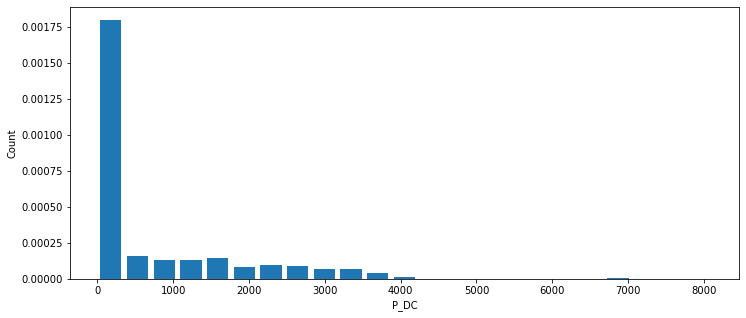

In [161]:
plt.figure(figsize=(12,5))
plt.hist(df12['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

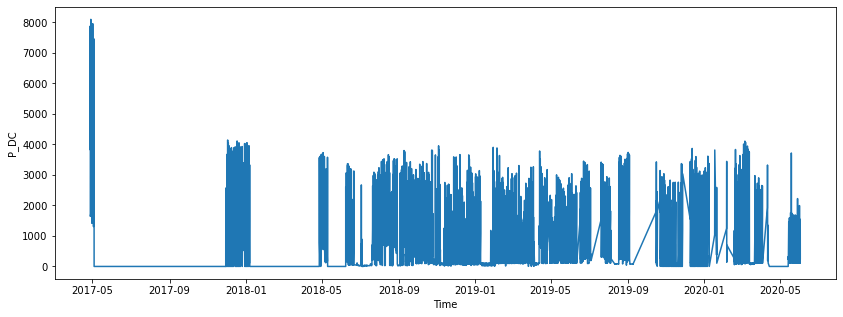

In [162]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df12.index ,y='P_DC' ,data=df12)

In [163]:
mask = (df12.index > '2017-11-01')
df12 = df12.loc[mask]

In [164]:
days_hour = []
clean_low(df12, 1000,days_hour)
for i in days_hour:
    df12 = df12[df12.index != i]
df12

,Adresse,T1,P_DC
Time,,,
2017-11-29 08:00:00,115.0,20.754617,0.000000
2017-11-29 09:00:00,115.0,24.556300,0.000000
2017-11-29 10:00:00,115.0,29.512257,0.000000
2017-11-29 11:00:00,115.0,30.977570,644.821757
2017-11-29 12:00:00,115.0,28.334947,2570.020333
...,...,...,...
2020-06-01 14:00:00,115.0,33.094297,106.507467
2020-06-01 15:00:00,115.0,33.410037,662.250200
2020-06-01 16:00:00,115.0,33.424997,1395.717700


 # Stationary test

In [165]:
dftest = adfuller(df12['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.0718459920989094e-11


  # Autocorrelation_ PACF 

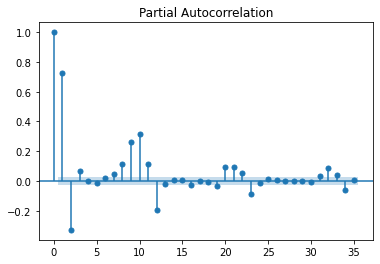

In [166]:
sm.graphics.tsa.plot_pacf(df12['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [167]:
df_AR1 = df12['P_DC']
train_size = int(len(df12) * 0.95)
test_size = len(df12) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df12)]
print(len(train), len(test))

5165 272


In [168]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 5165
Model:                     AutoReg(4)   Log Likelihood              -41332.589
Method:               Conditional MLE   S.D. of innovations            727.563
Date:                Thu, 12 Aug 2021   AIC                             13.182
Time:                        15:11:41   BIC                             13.189
Sample:                             4   HQIC                            13.184
                                 5165                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    432.9364     18.250     23.722      0.000     397.166     468.706
P_DC.L1        0.9928      0.014     71.321      0.000       0.966       1.020
P_DC.L2       -0.3898      0.020    -19.887      0.0

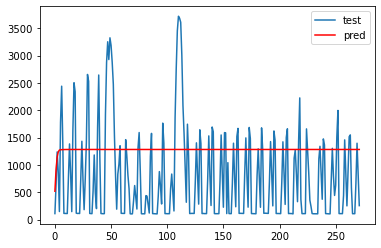

In [169]:
pred = model.predict(start = train_size, end = len(df12)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [170]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=86843.925, Time=3.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=88452.478, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=88332.148, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=88244.515, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=88450.478, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=86948.643, Time=2.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=86843.196, Time=3.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=88190.674, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=87934.343, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=86844.755, Time=4.00 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=87805.414, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=86878.755, Time=5.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=86841.412, Time=1.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=88188.673, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5437
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -43416.706
Date:                Thu, 12 Aug 2021   AIC                          86841.412
Time:                        15:12:11   BIC                          86867.816
Sample:                             0   HQIC                         86850.627
                               - 5437                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9295      0.013     72.857      0.000       0.904       0.954
ar.L2         -0.3681      0.013    -29.092      0.000      -0.393      -0.343
ma.L1         -0.9768      0.003   -308.325      0.000      -0.983      -0.971
sigma2      5.066e+05   1.01e+04     50.101      0.000    4.87e+05    5.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                67.20
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.10
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
model = ARIMA(train, order=(2,1,1)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98169D+00    |proj g|=  3.47997D-03


 This problem is unconstrained.



At iterate    5    f=  7.98148D+00    |proj g|=  8.31912D-03

At iterate   10    f=  7.98142D+00    |proj g|=  1.71800D-03

At iterate   15    f=  7.98140D+00    |proj g|=  2.31548D-04

At iterate   20    f=  7.98140D+00    |proj g|=  1.79652D-03

At iterate   25    f=  7.98139D+00    |proj g|=  5.69322D-05

At iterate   30    f=  7.98139D+00    |proj g|=  3.08553D-04

At iterate   35    f=  7.98139D+00    |proj g|=  6.38423D-04

At iterate   40    f=  7.98139D+00    |proj g|=  3.81917D-06

At iterate   45    f=  7.98139D+00    |proj g|=  4.97380D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     61   

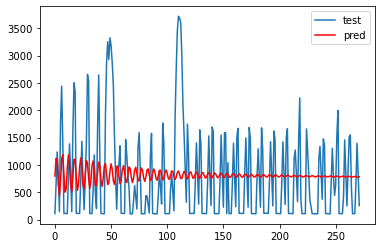

In [172]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df13

In [173]:
df13 = pd.read_csv('df13.csv')
df13 = df13[['Time','Adresse','T1','P_DC']]
df13['Time']= pd.to_datetime(df13['Time'])
df13 = df13.set_index('Time')
df13 = df13.resample('1H').mean()
df13 = df13.between_time('08:00','18:00')
df13 = df13[df13 >= 0]
df13.isna().sum()

Adresse    2284
T1         2294
P_DC       2649
dtype: int64

In [174]:
df13 = df13.dropna()
df13

,Adresse,T1,P_DC
Time,,,
2018-02-13 15:00:00,124.0,42.346104,9.110086
2018-02-13 16:00:00,124.0,35.936703,6.950680
2018-02-13 17:00:00,124.0,24.406243,12.190473
2018-02-13 18:00:00,124.0,13.483043,1.167607
2018-02-14 08:00:00,124.0,14.752150,37.851947
...,...,...,...
2020-06-01 14:00:00,124.0,52.088650,51.431553
2020-06-01 15:00:00,124.0,48.201837,410.540950
2020-06-01 16:00:00,124.0,43.329110,1164.580377


Text(0, 0.5, 'Count')

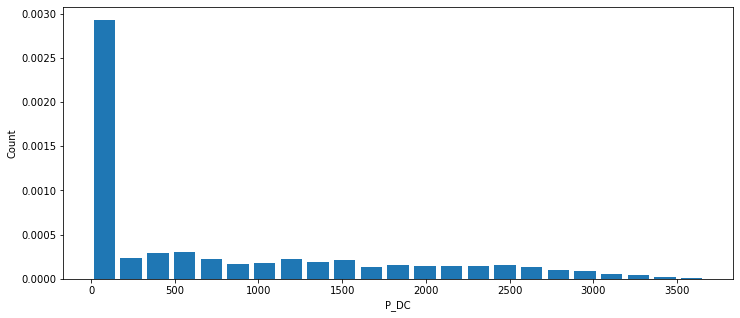

In [175]:
plt.figure(figsize=(12,5))
plt.hist(df13['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

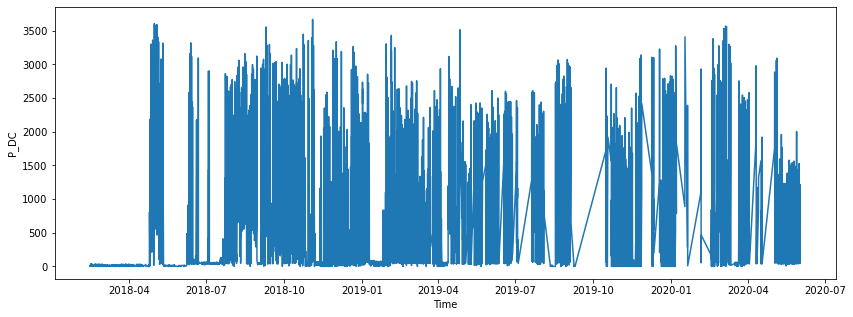

In [176]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df13.index ,y='P_DC' ,data=df13)

In [177]:
mask = (df13.index > '2018-04-15')
df13 = df13.loc[mask]

In [178]:
days_hour = []
clean_low(df13, 500,days_hour)
for i in days_hour:
    df13 = df13[df13.index != i]
df13

,Adresse,T1,P_DC
Time,,,
2018-04-24 08:00:00,124.0,15.912357,30.332777
2018-04-24 09:00:00,124.0,19.612327,28.014183
2018-04-24 10:00:00,124.0,31.918343,3.068640
2018-04-24 13:00:00,124.0,35.010373,1.019957
2018-04-24 16:00:00,124.0,15.496423,7.079707
...,...,...,...
2020-06-01 14:00:00,124.0,52.088650,51.431553
2020-06-01 15:00:00,124.0,48.201837,410.540950
2020-06-01 16:00:00,124.0,43.329110,1164.580377


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

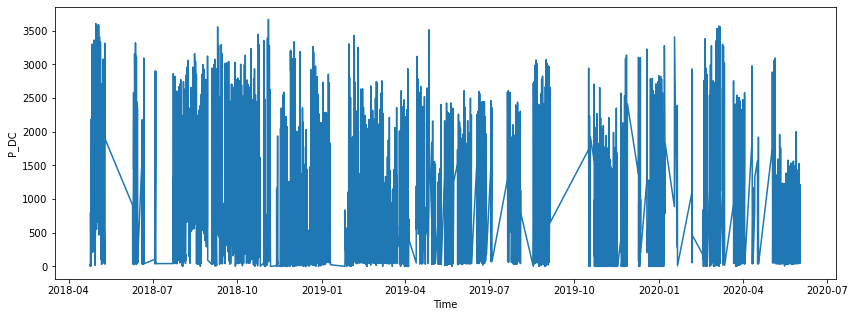

In [179]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df13.index ,y='P_DC' ,data=df13)

 # Stationary test

In [180]:
dftest = adfuller(df13['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 1.0861639295148728e-11


 # Autocorrelation_ PACF  

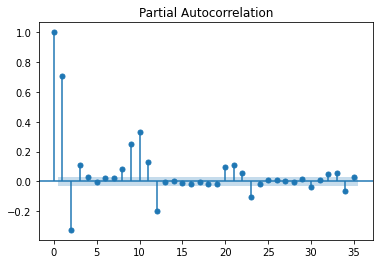

In [181]:
sm.graphics.tsa.plot_pacf(df13['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [182]:
df_AR1 = df13['P_DC']
train_size = int(len(df13) * 0.95)
test_size = len(df13) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df13)]
print(len(train), len(test))

4822 254


In [183]:
model = AutoReg(train, lags = 4).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4822
Model:                     AutoReg(4)   Log Likelihood              -38001.377
Method:               Conditional MLE   S.D. of innovations            644.476
Date:                Thu, 12 Aug 2021   AIC                             12.939
Time:                        15:13:09   BIC                             12.947
Sample:                             4   HQIC                            12.942
                                 4822                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    349.9923     16.134     21.693      0.000     318.370     381.614
P_DC.L1        0.9715      0.014     67.473      0.000       0.943       1.000
P_DC.L2       -0.4109      0.020    -20.483      0.0

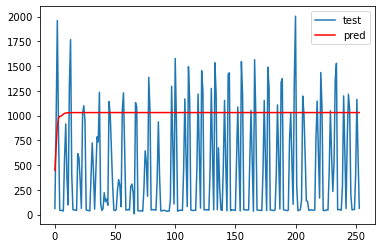

In [184]:
pred = model.predict(start = train_size, end = len(df13)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [185]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=79830.463, Time=3.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81418.158, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=81332.722, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=81245.370, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=81416.158, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=79922.942, Time=2.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=79838.366, Time=2.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=79808.500, Time=5.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=79849.410, Time=2.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=79833.672, Time=6.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=7.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=79843.191, Time=6.02 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=79863.177, Time=8.24 sec
 ARIMA(2,1,3)(0,0,0)[0]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5076
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -39897.253
Date:                Thu, 12 Aug 2021   AIC                          79806.505
Time:                        15:14:23   BIC                          79845.698
Sample:                             0   HQIC                         79820.231
                               - 5076                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2197      0.035     35.140      0.000       1.152       1.288
ar.L2         -0.5082      0.019    -26.562      0.000      -0.546      -0.471
ma.L1         -1.2913      0.037    -35.054      0.000      -1.364      -1.219
ma.L2          0.1223      0.033      3.701      0.000       0.058       0.187
ma.L3          0.2137      0.026      8.207      0.000       0.163       0.265
sigma2      3.889e+05   7343.464     52.964      0.000    3.75e+05    4.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                96.73
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.01
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
model = ARIMA(train, order=(2,1,3)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82054D+00    |proj g|=  1.10685D-03

At iterate    5    f=  7.82053D+00    |proj g|=  7.01039D-04


 This problem is unconstrained.



At iterate   10    f=  7.82053D+00    |proj g|=  5.96589D-04

At iterate   15    f=  7.82053D+00    |proj g|=  1.62892D-04

At iterate   20    f=  7.82053D+00    |proj g|=  4.00746D-04

At iterate   25    f=  7.82052D+00    |proj g|=  3.77920D-04

At iterate   30    f=  7.82051D+00    |proj g|=  6.98996D-05

At iterate   35    f=  7.82051D+00    |proj g|=  4.60876D-04

At iterate   40    f=  7.82051D+00    |proj g|=  3.14415D-05

At iterate   45    f=  7.82051D+00    |proj g|=  3.09086D-05

At iterate   50    f=  7.82051D+00    |proj g|=  3.73035D-06

At iterate   55    f=  7.82051D+00    |proj g|=  9.85878D-06

At iterate   60    f=  7.82051D+00    |proj g|=  3.28626D-05

At iterate   65    f=  7.82051D+00    |proj g|=  7.89591D-05

At iterate   70    f=  7.82051D+00    |proj g|=  2.50466D-05

At iterate   75    f=  7.82051D+00    |proj g|=  2.57572D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

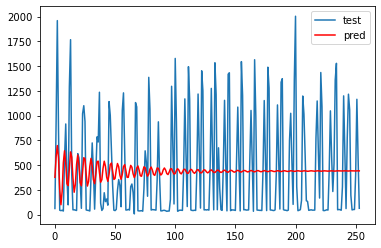

In [187]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df15

In [188]:
df15 = pd.read_csv('df15.csv')
df15 = df15[['Time','Adresse','T1','P_DC']]
df15['Time']= pd.to_datetime(df15['Time'])
df15 = df15.set_index('Time')
df15 = df15.resample('1H').mean()
df15 = df15.between_time('08:00','18:00')
df15 = df15[df15 >= 0]
df15.isna().sum()

Adresse    2019
T1         2031
P_DC       2975
dtype: int64

In [189]:
df15 = df15.dropna()
df15

,Adresse,T1,P_DC
Time,,,
2018-02-13 15:00:00,128.0,35.814086,0.000000
2018-02-13 16:00:00,128.0,30.881083,0.000000
2018-02-13 17:00:00,128.0,21.702113,0.000000
2018-02-13 18:00:00,128.0,13.584370,0.000000
2018-02-14 09:00:00,128.0,21.956750,0.000000
...,...,...,...
2020-06-01 14:00:00,128.0,52.057607,51.301987
2020-06-01 15:00:00,128.0,47.426580,451.690450
2020-06-01 16:00:00,128.0,43.362890,1732.158083


Text(0, 0.5, 'Count')

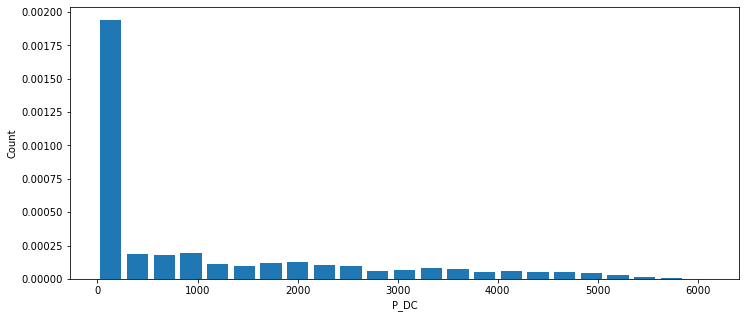

In [190]:
plt.figure(figsize=(12,5))
plt.hist(df15['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

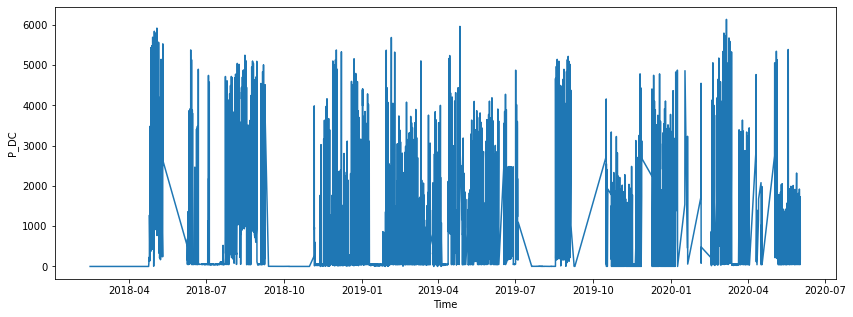

In [191]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df15.index ,y='P_DC' ,data=df15)

In [192]:
mask = (df15.index > '2018-04-15')
df15 = df15.loc[mask]

In [193]:
days_hour = []
clean_low(df15, 1000,days_hour)
for i in days_hour:
    df15 = df15[df15.index != i]
df15

,Adresse,T1,P_DC
Time,,,
2018-04-24 12:00:00,128.0,43.479860,229.697317
2018-04-24 16:00:00,128.0,15.591087,126.716070
2018-04-24 17:00:00,128.0,20.576510,1124.222020
2018-04-24 18:00:00,128.0,20.494107,1275.070867
2018-04-25 08:00:00,128.0,14.675337,144.668897
...,...,...,...
2020-06-01 14:00:00,128.0,52.057607,51.301987
2020-06-01 15:00:00,128.0,47.426580,451.690450
2020-06-01 16:00:00,128.0,43.362890,1732.158083


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

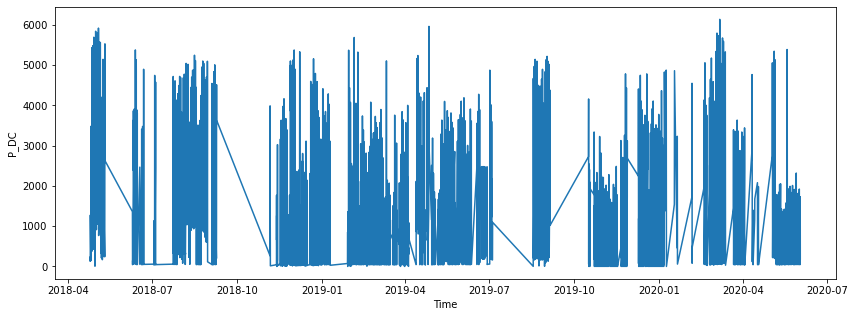

In [194]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df15.index ,y='P_DC' ,data=df15)

 # Stationary test

In [195]:
dftest = adfuller(df15['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 3.86256926617462e-08


 # Autocorrelation_ PACF  

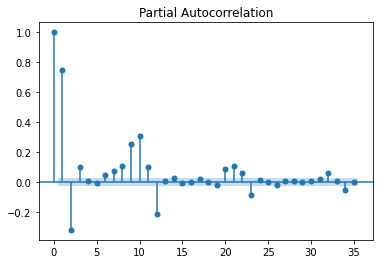

In [196]:
sm.graphics.tsa.plot_pacf(df15['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [197]:
df_AR1 = df15['P_DC'] 
train_size = int(len(df15) * 0.95)
test_size = len(df15) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df15)]
print(len(train), len(test))

4231 223


In [198]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4231
Model:                     AutoReg(4)   Log Likelihood              -35095.525
Method:               Conditional MLE   S.D. of innovations            976.295
Date:                Thu, 12 Aug 2021   AIC                             13.770
Time:                        15:15:26   BIC                             13.779
Sample:                             4   HQIC                            13.774
                                 4231                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    460.1961     24.233     18.991      0.000     412.701     507.691
P_DC.L1        1.0154      0.015     66.027      0.000       0.985       1.046
P_DC.L2       -0.4070      0.022    -18.590      0.0

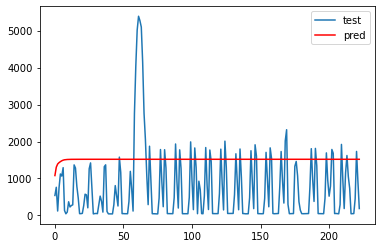

In [199]:
pred = model.predict(start = train_size, end = len(df15)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [200]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=73679.571, Time=3.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=74976.668, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=74874.608, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=74795.720, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=74974.669, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=73766.514, Time=2.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=73679.141, Time=2.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=74749.164, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=74525.254, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=73680.148, Time=3.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=74428.018, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=73686.600, Time=3.73 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=73677.232, Time=0.82 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=74747.164, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4454
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -36834.616
Date:                Thu, 12 Aug 2021   AIC                          73677.232
Time:                        15:15:49   BIC                          73702.838
Sample:                             0   HQIC                         73686.259
                               - 4454                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9249      0.014     68.476      0.000       0.898       0.951
ar.L2         -0.3765      0.013    -28.624      0.000      -0.402      -0.351
ma.L1         -0.9594      0.005   -200.980      0.000      -0.969      -0.950
sigma2      8.957e+05   1.74e+04     51.399      0.000    8.62e+05     9.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               193.33
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [201]:
model = ARIMA(train, order=(2,1,1)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30251D+00    |proj g|=  6.75016D-05

At iterate    5    f=  8.30251D+00    |proj g|=  1.77638D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      8      1     0     0   1.776D-07   8.303D+00
  F =   8.3025071519939182     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   P_DC   No. Observati

 This problem is unconstrained.


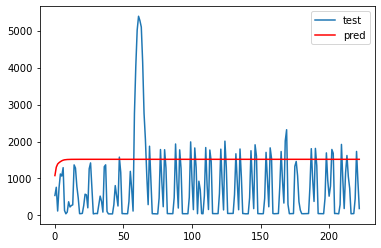

In [202]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df16

In [203]:
df16 = pd.read_csv('df16.csv')
df16 = df16[['Time','Adresse','T1','P_DC']]
df16['Time']= pd.to_datetime(df16['Time'])
df16 = df16.set_index('Time')
df16 = df16.resample('1H').mean()
df16 = df16.between_time('08:00','18:00')
df16 = df16[df16 >= 0]
df16.isna().sum()

Adresse    2019
T1         2030
P_DC       3334
dtype: int64

In [204]:
df16 = df16.dropna()
df16

,Adresse,T1,P_DC
Time,,,
2018-02-13 15:00:00,129.0,36.592962,0.000000
2018-02-13 16:00:00,129.0,32.206707,0.000000
2018-02-13 17:00:00,129.0,22.165260,0.000000
2018-02-13 18:00:00,129.0,13.388423,0.000000
2018-02-14 08:00:00,129.0,12.899213,0.000000
...,...,...,...
2020-01-20 15:00:00,129.0,12.870693,854.019867
2020-01-20 16:00:00,129.0,13.629557,751.184120
2020-01-20 17:00:00,129.0,9.652352,50.212652


Text(0, 0.5, 'Count')

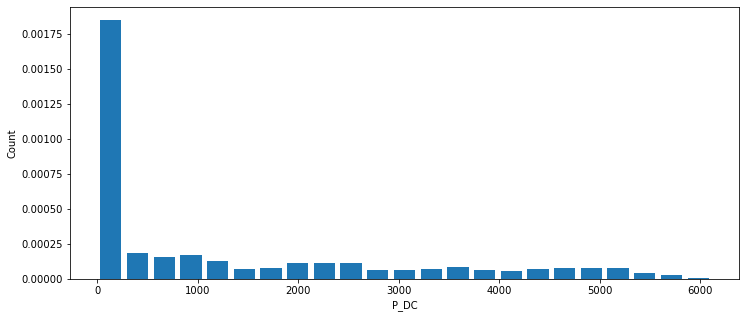

In [205]:
plt.figure(figsize=(12,5))
plt.hist(df16['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

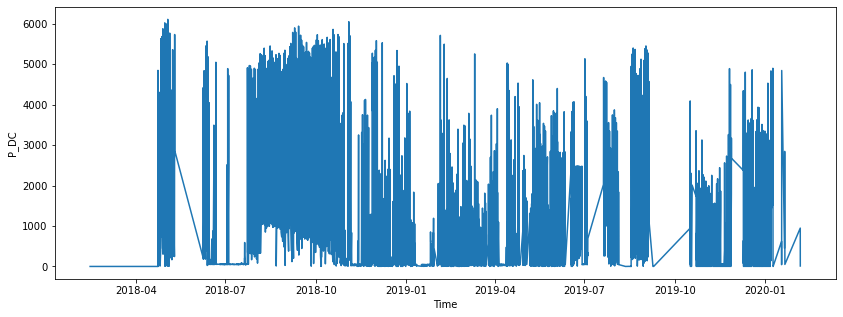

In [206]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df16.index ,y='P_DC' ,data=df16)

In [207]:
mask = (df16.index > '2018-04-15')
df16 = df16.loc[mask]

In [208]:
days_hour = []
clean_low(df16, 1000,days_hour)
for i in days_hour:
    df16 = df16[df16.index != i]
df16

,Adresse,T1,P_DC
Time,,,
2018-04-23 10:00:00,129.0,31.559690,0.000000
2018-04-23 11:00:00,129.0,36.305503,1839.735403
2018-04-23 12:00:00,129.0,35.546897,3430.184657
2018-04-23 13:00:00,129.0,38.382243,4696.710533
2018-04-23 14:00:00,129.0,37.557263,4849.621667
...,...,...,...
2020-01-20 13:00:00,129.0,22.369377,1277.891790
2020-01-20 14:00:00,129.0,31.553453,1722.654290
2020-01-20 15:00:00,129.0,12.870693,854.019867


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

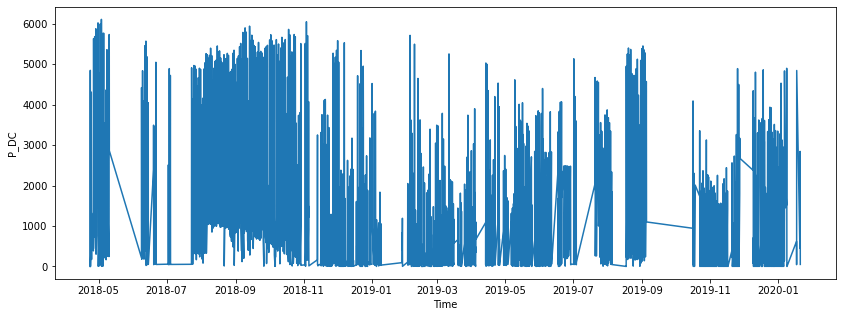

In [209]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df16.index ,y='P_DC' ,data=df16)

 # Stationary test

In [210]:
dftest = adfuller(df16['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 0.001151833428258863


 # Autocorrelation_ PACF  

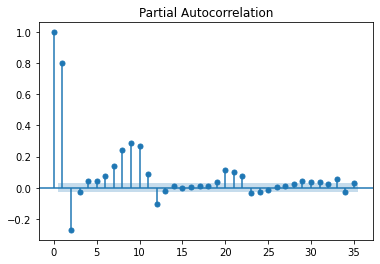

In [211]:
sm.graphics.tsa.plot_pacf(df16['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [212]:
df_AR1 = df16['P_DC'] 
train_size = int(len(df16) * 0.95)
test_size = len(df16) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df16)]
print(len(train), len(test))

4071 215


In [213]:
model = AutoReg(train, lags = 4).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4071
Model:                     AutoReg(4)   Log Likelihood              -33824.913
Method:               Conditional MLE   S.D. of innovations            990.274
Date:                Thu, 12 Aug 2021   AIC                             13.799
Time:                        15:16:43   BIC                             13.808
Sample:                             4   HQIC                            13.802
                                 4071                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    432.4855     24.815     17.428      0.000     383.848     481.123
P_DC.L1        1.0414      0.016     66.473      0.000       1.011       1.072
P_DC.L2       -0.2600      0.023    -11.488      0.0

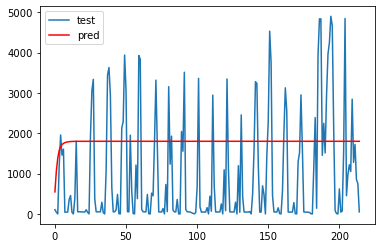

In [214]:
pred = model.predict(start = train_size, end = len(df16)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [215]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=70838.636, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72171.166, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=72077.735, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72059.638, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=72169.166, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=71219.103, Time=2.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=71044.950, Time=2.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=70871.297, Time=4.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=70823.136, Time=5.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=71110.967, Time=3.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=70825.831, Time=4.13 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=70537.432, Time=6.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=71082.616, Time=5.19 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=70830.379, Time=6.90 sec
 ARIMA(2,1,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4286
Model:               SARIMAX(3, 1, 5)   Log Likelihood              -35179.271
Date:                Thu, 12 Aug 2021   AIC                          70378.542
Time:                        15:18:16   BIC                          70442.171
Sample:                             0   HQIC                         70401.018
                               - 4286                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1023      0.461      0.222      0.824      -0.802       1.006
ar.L1          1.7583      0.064     27.357      0.000       1.632       1.884
ar.L2         -1.1346      0.107    -10.593      0.000      -1.344      -0.925
ar.L3          0.0863      0.063      1.367      0.172      -0.037       0.210
ma.L1         -1.9652      0.064    -30.688      0.000      -2.091      -1.840
ma.L2          1.1500      0.125      9.209      0.000       0.905       1.395
ma.L3          0.0188      0.071      0.264      0.792      -0.121       0.159
ma.L4          0.0055      0.038      0.144      0.885      -0.070       0.081
ma.L5         -0.1783      0.029     -6.245      0.000      -0.234      -0.122
sigma2      8.005e+05   1.31e+04     61.058      0.000    7.75e+05    8.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1125.70
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [216]:
model = ARIMA(train, order=(3,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24864D+00    |proj g|=  3.74634D-04

At iterate    5    f=  8.24864D+00    |proj g|=  8.38440D-05


 This problem is unconstrained.



At iterate   10    f=  8.24864D+00    |proj g|=  1.95399D-06

At iterate   15    f=  8.24864D+00    |proj g|=  7.81597D-06

At iterate   20    f=  8.24864D+00    |proj g|=  4.61853D-06

At iterate   25    f=  8.24864D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   1.776D-07   8.249D+00
  F =   8.2486384376230166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 4070
Model:           

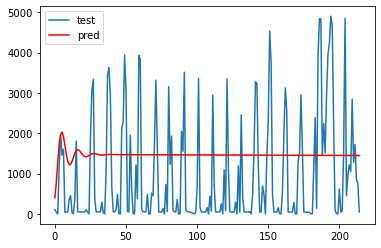

In [217]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df17

In [218]:
df17 = pd.read_csv('df17.csv')
df17 = df17[['Time','Adresse','T1','P_DC']]
df17['Time']= pd.to_datetime(df17['Time'])
df17 = df17.set_index('Time')
df17 = df17.resample('1H').mean()
df17 = df17.between_time('08:00','18:00')
df17 = df17[df17 >= 0]
df17.isna().sum()

Adresse    2019
T1         2019
P_DC       2072
dtype: int64

In [219]:
df17 = df17.dropna()
df17

,Adresse,T1,P_DC
Time,,,
2018-02-13 15:00:00,114.0,20.194414,0.000000
2018-02-13 16:00:00,114.0,20.296940,0.000000
2018-02-13 17:00:00,114.0,18.371220,0.000000
2018-02-13 18:00:00,114.0,15.228873,0.000000
2018-02-14 08:00:00,114.0,8.010773,0.000000
...,...,...,...
2020-06-01 14:00:00,114.0,32.346107,4511.262333
2020-06-01 15:00:00,114.0,32.905677,3673.085000
2020-06-01 16:00:00,114.0,33.491517,2433.340000


Text(0, 0.5, 'Count')

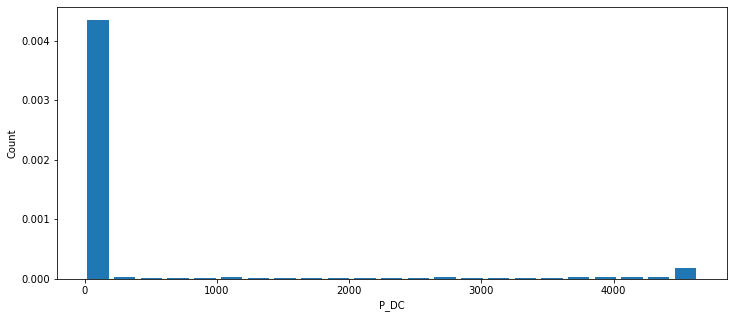

In [220]:
plt.figure(figsize=(12,5))
plt.hist(df17['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

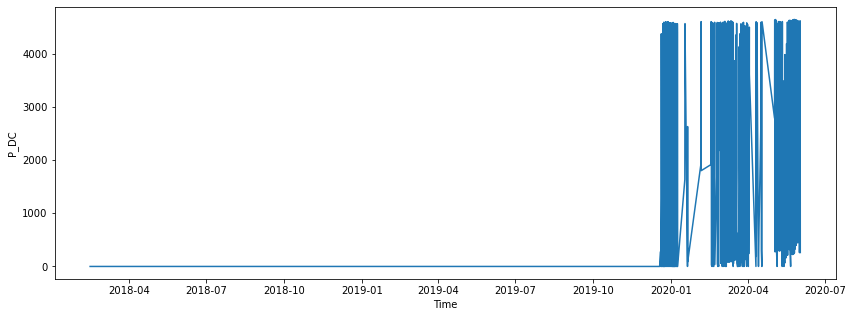

In [221]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df17.index ,y='P_DC' ,data=df17)

In [222]:
mask = (df17.index > '2019-12-15')
df17 = df17.loc[mask]

In [223]:
days_hour = []
clean_low(df17, 1000,days_hour)
for i in days_hour:
    df17 = df17[df17.index != i]
df17

,Adresse,T1,P_DC
Time,,,
2019-12-20 11:00:00,114.0,16.594948,1275.963179
2019-12-20 12:00:00,114.0,18.236221,4372.516552
2019-12-20 13:00:00,114.0,18.995655,2692.014138
2019-12-20 14:00:00,114.0,21.188713,3494.304000
2019-12-20 15:00:00,114.0,18.881403,2742.419667
...,...,...,...
2020-06-01 14:00:00,114.0,32.346107,4511.262333
2020-06-01 15:00:00,114.0,32.905677,3673.085000
2020-06-01 16:00:00,114.0,33.491517,2433.340000


<AxesSubplot:xlabel='Time', ylabel='P_DC'>

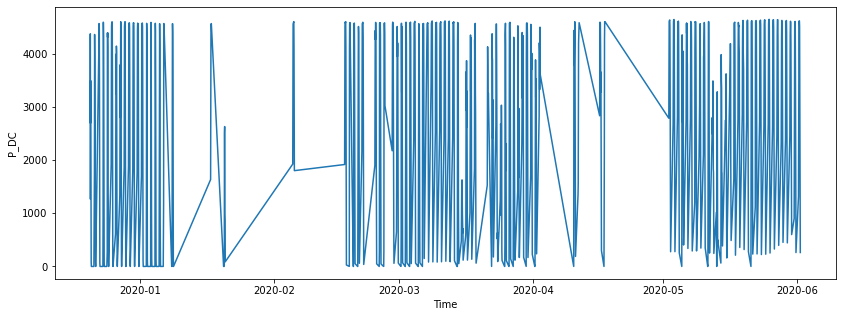

In [224]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df17.index ,y='P_DC' ,data=df17)

 # Stationary test

In [225]:
dftest = adfuller(df17['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 0.001176712160427214


 # Autocorrelation_ PACF  

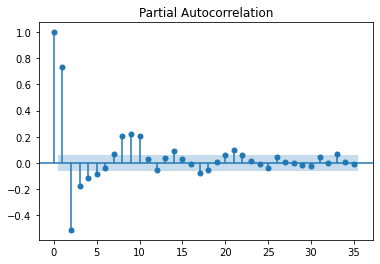

In [226]:
sm.graphics.tsa.plot_pacf(df17['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [253]:
df_AR1 = df17['P_DC'] 
train_size = int(len(df17) * 0.95)
test_size = len(df17) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df17)]
print(len(train), len(test))

954 51


In [256]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                  954
Model:                     AutoReg(3)   Log Likelihood               -7900.439
Method:               Conditional MLE   S.D. of innovations            980.996
Date:                Thu, 12 Aug 2021   AIC                             13.788
Time:                        15:30:35   BIC                             13.813
Sample:                             3   HQIC                            13.797
                                  954                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1291.1985     72.843     17.726      0.000    1148.428    1433.968
P_DC.L1        1.0298      0.032     32.303      0.000       0.967       1.092
P_DC.L2       -0.3345      0.045     -7.493      0.0

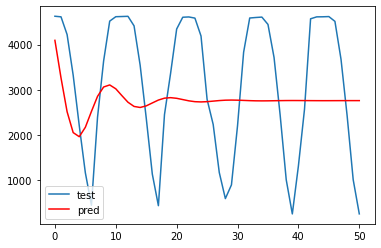

In [255]:
pred = model.predict(start = train_size, end = len(df17)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [230]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16627.945, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17147.974, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17042.227, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17028.978, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17145.976, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17027.475, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16627.680, Time=1.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16667.727, Time=0.92 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16619.951, Time=1.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16642.305, Time=1.16 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=16610.121, Time=1.82 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=16641.004, Time=1.37 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(4,1,3)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1005
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -8269.635
Date:                Thu, 12 Aug 2021   AIC                          16557.270
Time:                        15:19:34   BIC                          16601.475
Sample:                             0   HQIC                         16574.068
                               - 1005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3878      0.542      0.715      0.474      -0.675       1.450
ar.L1          2.3722      0.062     38.369      0.000       2.251       2.493
ar.L2         -2.4408      0.115    -21.189      0.000      -2.667      -2.215
ar.L3          1.1597      0.100     11.563      0.000       0.963       1.356
ar.L4         -0.2649      0.044     -6.021      0.000      -0.351      -0.179
ma.L1         -2.4668      0.055    -45.081      0.000      -2.574      -2.360
ma.L2          2.2262      0.093     23.907      0.000       2.044       2.409
ma.L3         -0.7423      0.044    -17.003      0.000      -0.828      -0.657
sigma2      8.239e+05   3.35e+04     24.563      0.000    7.58e+05     8.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               150.03
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.35e+14. Standard errors may be unstable.
"""

In [232]:
model = ARIMA(train, order=(4,1,3)).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28044D+00    |proj g|=  2.75460D-03

At iterate    5    f=  8.28032D+00    |proj g|=  2.11973D-03

At iterate   10    f=  8.27154D+00    |proj g|=  4.72220D-02

At iterate   15    f=  8.25701D+00    |proj g|=  9.68097D-03

At iterate   20    f=  8.25577D+00    |proj g|=  1.23196D-02

At iterate   25    f=  8.25564D+00    |proj g|=  2.52633D-03

At iterate   30    f=  8.25564D+00    |proj g|=  4.33253D-04

At iterate   35    f=  8.25564D+00    |proj g|=  7.17648D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


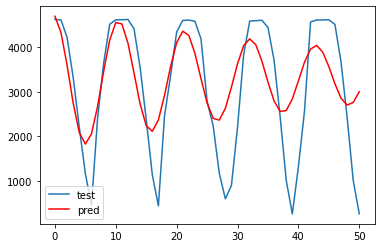

In [233]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df18

In [234]:
df18 = pd.read_csv('df18.csv')
df18 = df18[['Time','Adresse','T1','P_DC']]
df18['Time']= pd.to_datetime(df18['Time'])
df18 = df18.set_index('Time')
df18 = df18.resample('1H').mean()
df18 = df18.between_time('08:00','18:00')
df18 = df18[df18 >= 0]
df18.isna().sum()

Adresse    2019
T1         2028
P_DC       2180
dtype: int64

In [235]:
df18 = df18.dropna()
df18

,Adresse,T1,P_DC
Time,,,
2018-02-13 15:00:00,130.0,29.929076,4941.418571
2018-02-13 16:00:00,130.0,26.570023,3517.646000
2018-02-13 17:00:00,130.0,20.182347,1006.928133
2018-02-13 18:00:00,130.0,13.574460,16.211023
2018-02-14 08:00:00,130.0,12.649860,2370.331667
...,...,...,...
2020-06-01 14:00:00,130.0,51.382237,63.167600
2020-06-01 15:00:00,130.0,47.678120,1155.548713
2020-06-01 16:00:00,130.0,43.307807,6656.866370


Text(0, 0.5, 'Count')

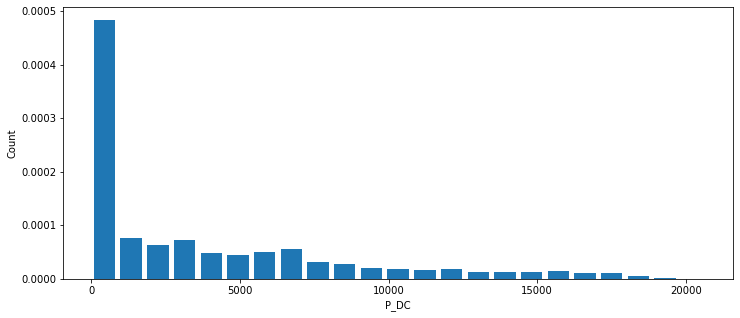

In [236]:
plt.figure(figsize=(12,5))
plt.hist(df18['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

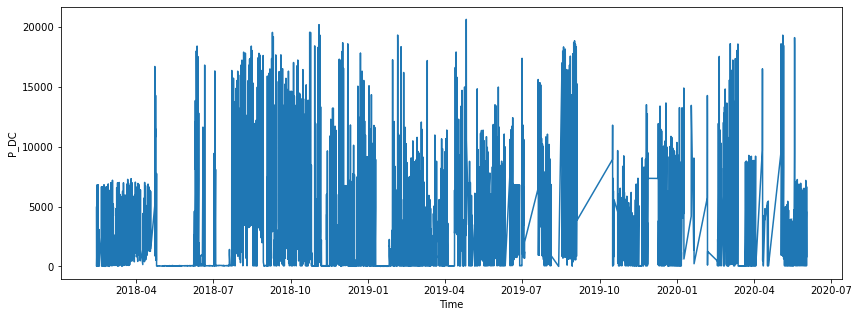

In [237]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df18.index ,y='P_DC' ,data=df18)

 # Stationary test

In [240]:
dftest = adfuller(df18['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 3.313691834013866e-13


 # Autocorrelation_ PACF 

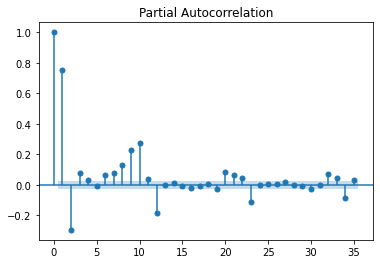

In [241]:
sm.graphics.tsa.plot_pacf(df18['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR   

In [242]:
df_AR1 = df18['P_DC'] 
train_size = int(len(df18) * 0.95)
test_size = len(df18) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df18)]
print(len(train), len(test))

5495 290


In [252]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 5495
Model:                     AutoReg(3)   Log Likelihood              -51853.716
Method:               Conditional MLE   S.D. of innovations           3049.531
Date:                Thu, 12 Aug 2021   AIC                             16.047
Time:                        15:30:04   BIC                             16.053
Sample:                             3   HQIC                            16.049
                                 5495                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1413.7770     62.685     22.554      0.000    1290.916    1536.638
P_DC.L1        1.0021      0.013     74.442      0.000       0.976       1.028
P_DC.L2       -0.3701      0.018    -20.097      0.0

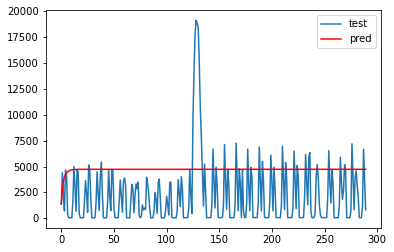

In [251]:
pred = model.predict(start = train_size, end = len(df18)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [245]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=108926.309, Time=5.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=110417.676, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=110310.828, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=110241.175, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=110415.676, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=109049.243, Time=2.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=108924.268, Time=2.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=110197.214, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=109949.115, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=108989.155, Time=2.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=109794.150, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=108952.836, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=108922.271, Time=1.88 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=110195.214, Time=0.34 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5785
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -54457.136
Date:                Thu, 12 Aug 2021   AIC                         108922.271
Time:                        15:21:46   BIC                         108948.923
Sample:                             0   HQIC                        108931.544
                               - 5785                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9212      0.011     87.311      0.000       0.900       0.942
ar.L2         -0.3482      0.011    -31.767      0.000      -0.370      -0.327
ma.L1         -0.9555      0.004   -232.865      0.000      -0.963      -0.947
sigma2      8.817e+06   2.83e-10   3.11e+16      0.000    8.82e+06    8.82e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               717.11
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.07
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+31. Standard errors may be unstable.
"""

In [248]:
model = ARIMA(train, order=(5,1,3)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42542D+00    |proj g|=  3.83338D-04

At iterate    5    f=  9.42541D+00    |proj g|=  1.63425D-05


 This problem is unconstrained.



At iterate   10    f=  9.42541D+00    |proj g|=  7.70939D-05

At iterate   15    f=  9.42541D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     31      1     0     0   1.776D-07   9.425D+00
  F =   9.4254094671273059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


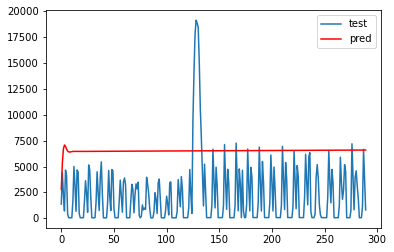

In [249]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()